In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 16)
import seaborn as sns
import os
from datetime import datetime

from sklearn.metrics import mean_squared_error as mse

In [2]:
def plot_boxplot(df, title, ylabel="Subject ID", xlabel="Hours"):
    fontdict = {"fontsize":40}
    plt.title(title)
    plt.title(title,fontdict)
    plt.ylabel(ylabel,fontdict)
    plt.xlabel(xlabel,fontdict)
    sns.boxplot(data=df, width = 0.5,orient="horizontal",) 
    
def plot_subjects(df,colName, title, xlabel):   
    fontdict = {"fontsize":20}
    plt.barh(df.index, df[colName],)
    plt.title(title,fontdict)
    plt.ylabel('Subject ID',fontdict)
    plt.xlabel(xlabel,fontdict)
    plt.show()

## Import data

As I found out in sensor_data.ipynb the following features add no information to the data.

"BRNoise","BRConfidence","GSR","LinkQuality","RSSI","TxPower", "SkinTemp".

For this reason I will drop them before continuing on.

In [3]:
data = pd.read_csv("data/processed_data/diabetes_subset/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_Summary.csv")

data["Time"] = pd.to_datetime(data["Time"], format="%d/%m/%Y %H:%M:%S.%f")
data.set_index("Time", drop=True, inplace=True)
orginal_columns = set(data.columns)
data.drop(columns=["BRNoise","BRConfidence","GSR","LinkQuality","RSSI","TxPower", "SkinTemp"], inplace=True)

In [4]:
data

,HR,BR,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,ECGAmplitude,ECGNoise,...,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp,StatusInfo,CoreTemp,AuxADC1,AuxADC2,AuxADC3
Time,,,,,,,,,,,,,,,,,,,,,
2014-10-01 10:09:39.417,65,8.1,19,0.41,0.84,4.161,93,5973.0,0.0000,0.00000,...,-0.22,0.75,-0.78,0.39,24.9,528,6553.5,420,433,499
2014-10-01 10:09:40.417,65,8.1,9,0.51,1.03,4.161,93,5361.0,0.0000,0.00000,...,-1.07,0.22,-0.46,0.36,24.9,528,6553.5,419,428,485
2014-10-01 10:09:41.417,65,7.3,11,0.30,0.74,4.161,93,4733.0,0.0000,0.00000,...,-0.95,1.07,-0.38,0.12,24.9,528,6553.5,415,420,484
2014-10-01 10:09:42.417,65,7.3,18,0.43,0.98,4.161,93,4094.0,0.0000,0.00000,...,-1.13,0.08,-0.34,0.49,24.9,528,6553.5,415,422,484
2014-10-01 10:09:43.417,65,6.6,19,0.49,1.10,4.161,93,3566.0,0.0000,0.00000,...,-1.53,0.83,-0.67,0.44,24.9,528,6553.5,399,406,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-01 22:23:21.417,0,7.6,28,0.25,0.46,3.781,30,2176.0,0.0008,0.00040,...,-0.49,0.24,-0.75,-0.18,34.3,528,37.1,415,422,483
2014-10-01 22:23:22.417,0,7.6,26,0.65,1.12,3.781,30,2612.0,0.0008,0.00016,...,0.15,1.32,-0.38,0.54,34.3,528,37.1,416,421,482
2014-10-01 22:23:23.417,0,7.8,50,0.56,0.92,3.781,30,2340.0,0.0008,0.00008,...,0.30,1.27,-0.13,0.39,34.3,528,37.1,414,420,483


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44027 entries, 2014-10-01 10:09:39.417000 to 2014-10-01 22:23:25.417000
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                44027 non-null  int64  
 1   BR                44027 non-null  float64
 2   Posture           44027 non-null  int64  
 3   Activity          44027 non-null  float64
 4   PeakAccel         44027 non-null  float64
 5   BatteryVolts      44027 non-null  float64
 6   BatteryLevel      44027 non-null  int64  
 7   BRAmplitude       44027 non-null  float64
 8   ECGAmplitude      44027 non-null  float64
 9   ECGNoise          44027 non-null  float64
 10  HRConfidence      44027 non-null  int64  
 11  HRV               44027 non-null  int64  
 12  SystemConfidence  44027 non-null  int64  
 13  ROGState          44027 non-null  int64  
 14  ROGTime           44027 non-null  int64  
 15  VerticalMin       44027 non-null  floa

According to this there are no null values in the dataset.  
In the next section I will investigate each feature and I will use the user manual for
the [Zephyr™ BioHarness](https://www.zephyranywhere.com/media/download/bioharness-log-data-descriptions-07-apr-2016.pdf) as guidance. 

## Investigating different variables

### HR: Heart Rate
1. **Range**: 25-240
2. **Units**: Beats per minute
3. **Potential Errors**
    1. Values consistently above 200+ bpm indicate a noisy ECG signal, may need to fix this.  
    2. Dropouts to 0 usually indicate a mechanical connection problem, imput np.nan for 0.

The HR detection algorithm initializes at 65bpm. This may show at the
beginning of a log for 7 seconds, but be invalid, as the algorithm processes
initial data.

I may drop *n* first data points to avoid the risk of cold starts and the harness put on wrong. 

In [6]:
data[["HR"]].describe()

,HR
count,44027.000000
mean,67.856429
std,34.059797
min,0.000000
25%,63.000000
50%,74.000000
75%,89.000000
max,180.000000


There are some values below the range and the bpm never goes above 200+.

<AxesSubplot:ylabel='Count'>

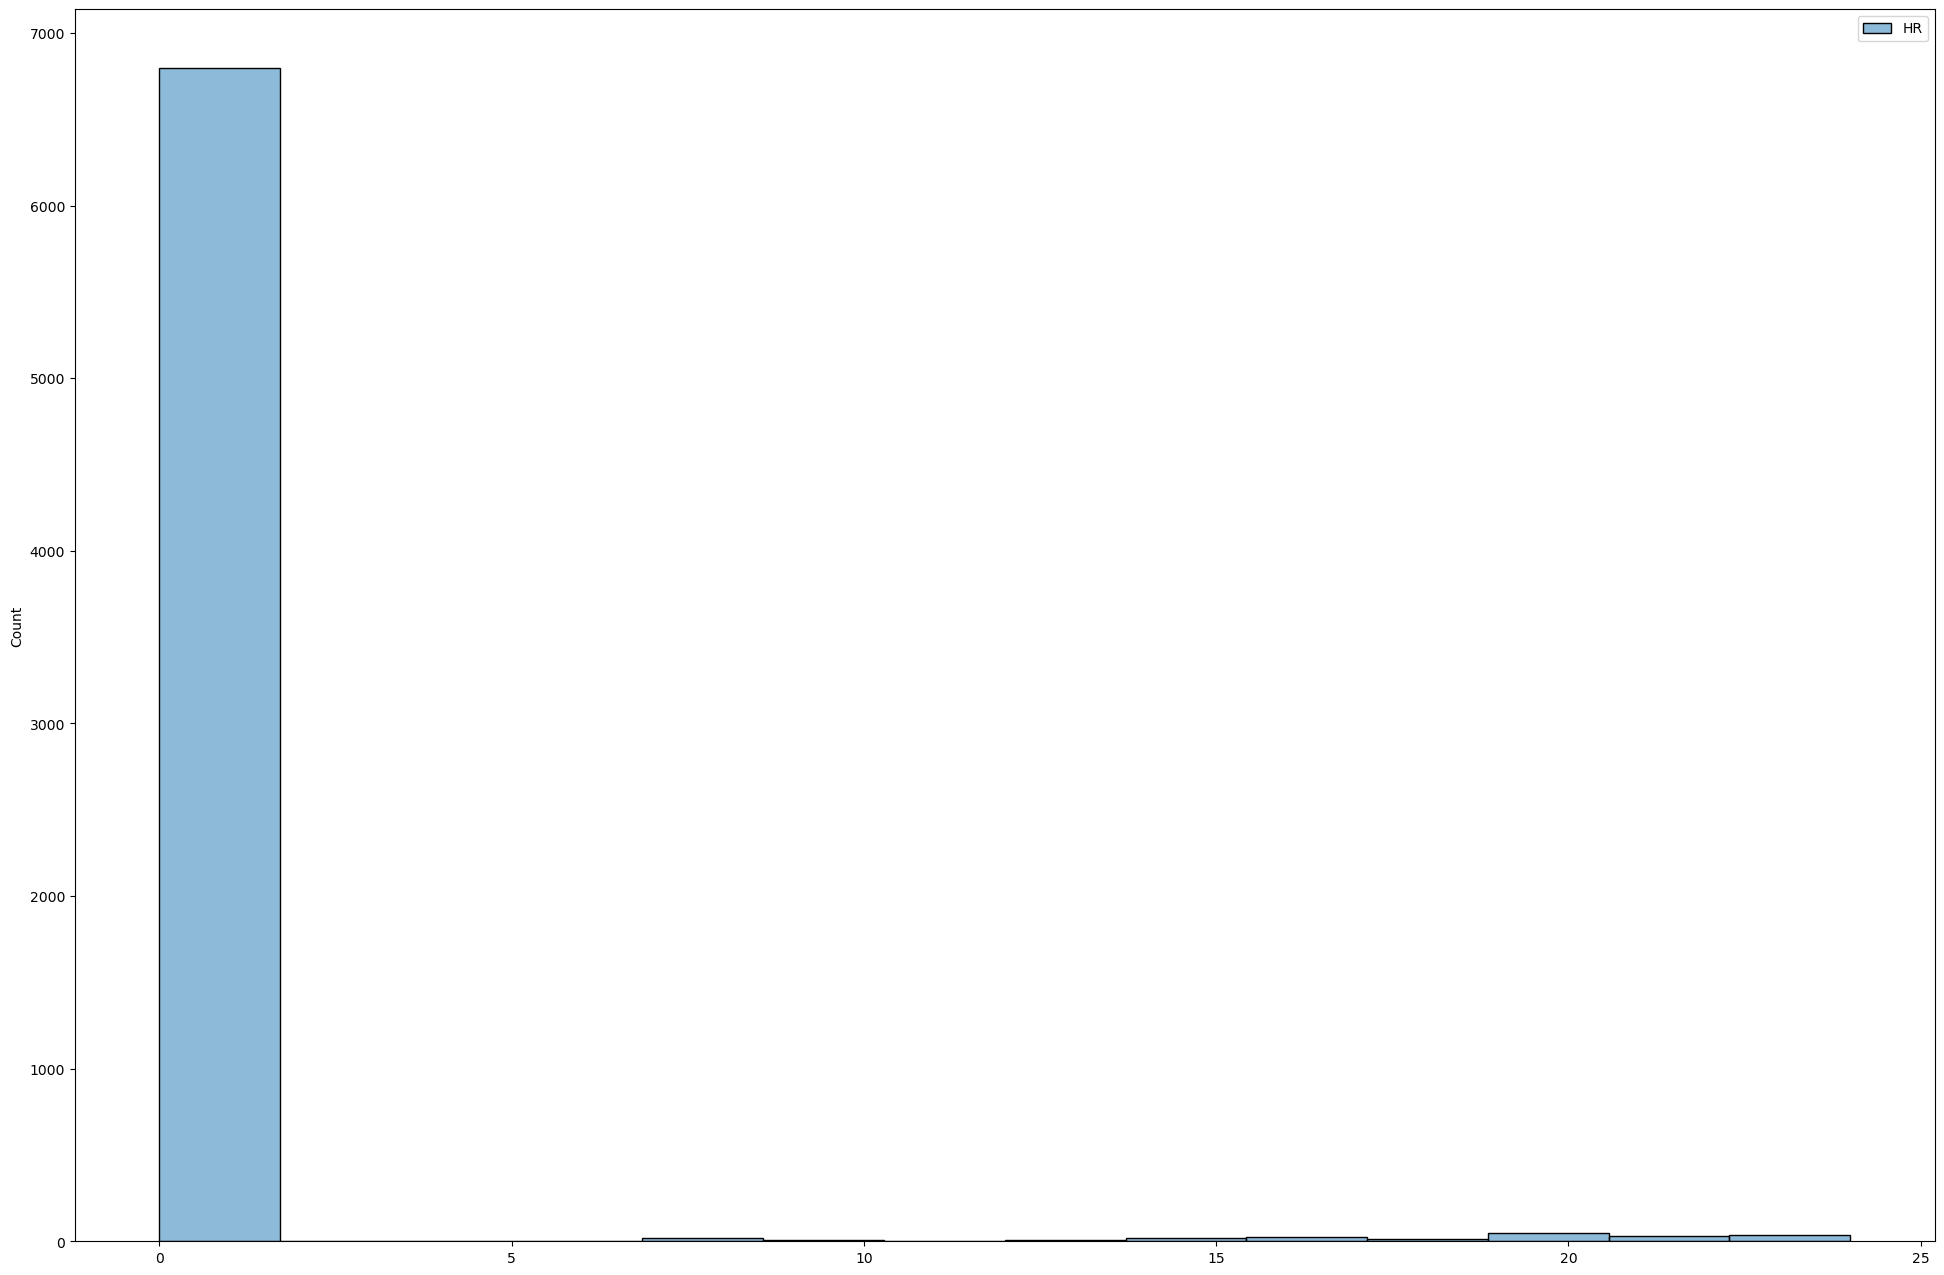

In [7]:
sns.histplot(data[["HR"]][data["HR"] < 25])

It is clear that for this example that there are a large number of dropouts with the value zero and some cases of anomalies where the BPM is unusally low. It is not clear if this is a fault in the readings or if the user had a very low BPM.

According to [link](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.)

A normal resting heart rate for adults ranges from 60 to 100 beats per minute.

Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness. For example, a well-trained athlete might have a normal resting heart rate closer to 40 beats per minute.

For this reason I will replace all values below 25 BPM to np.nan.
I may imput a moving average later on.

C:\Users\PC\AppData\Local\Temp\ipykernel_12388\2378860264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HR"][data["HR"] < 25] = np.nan


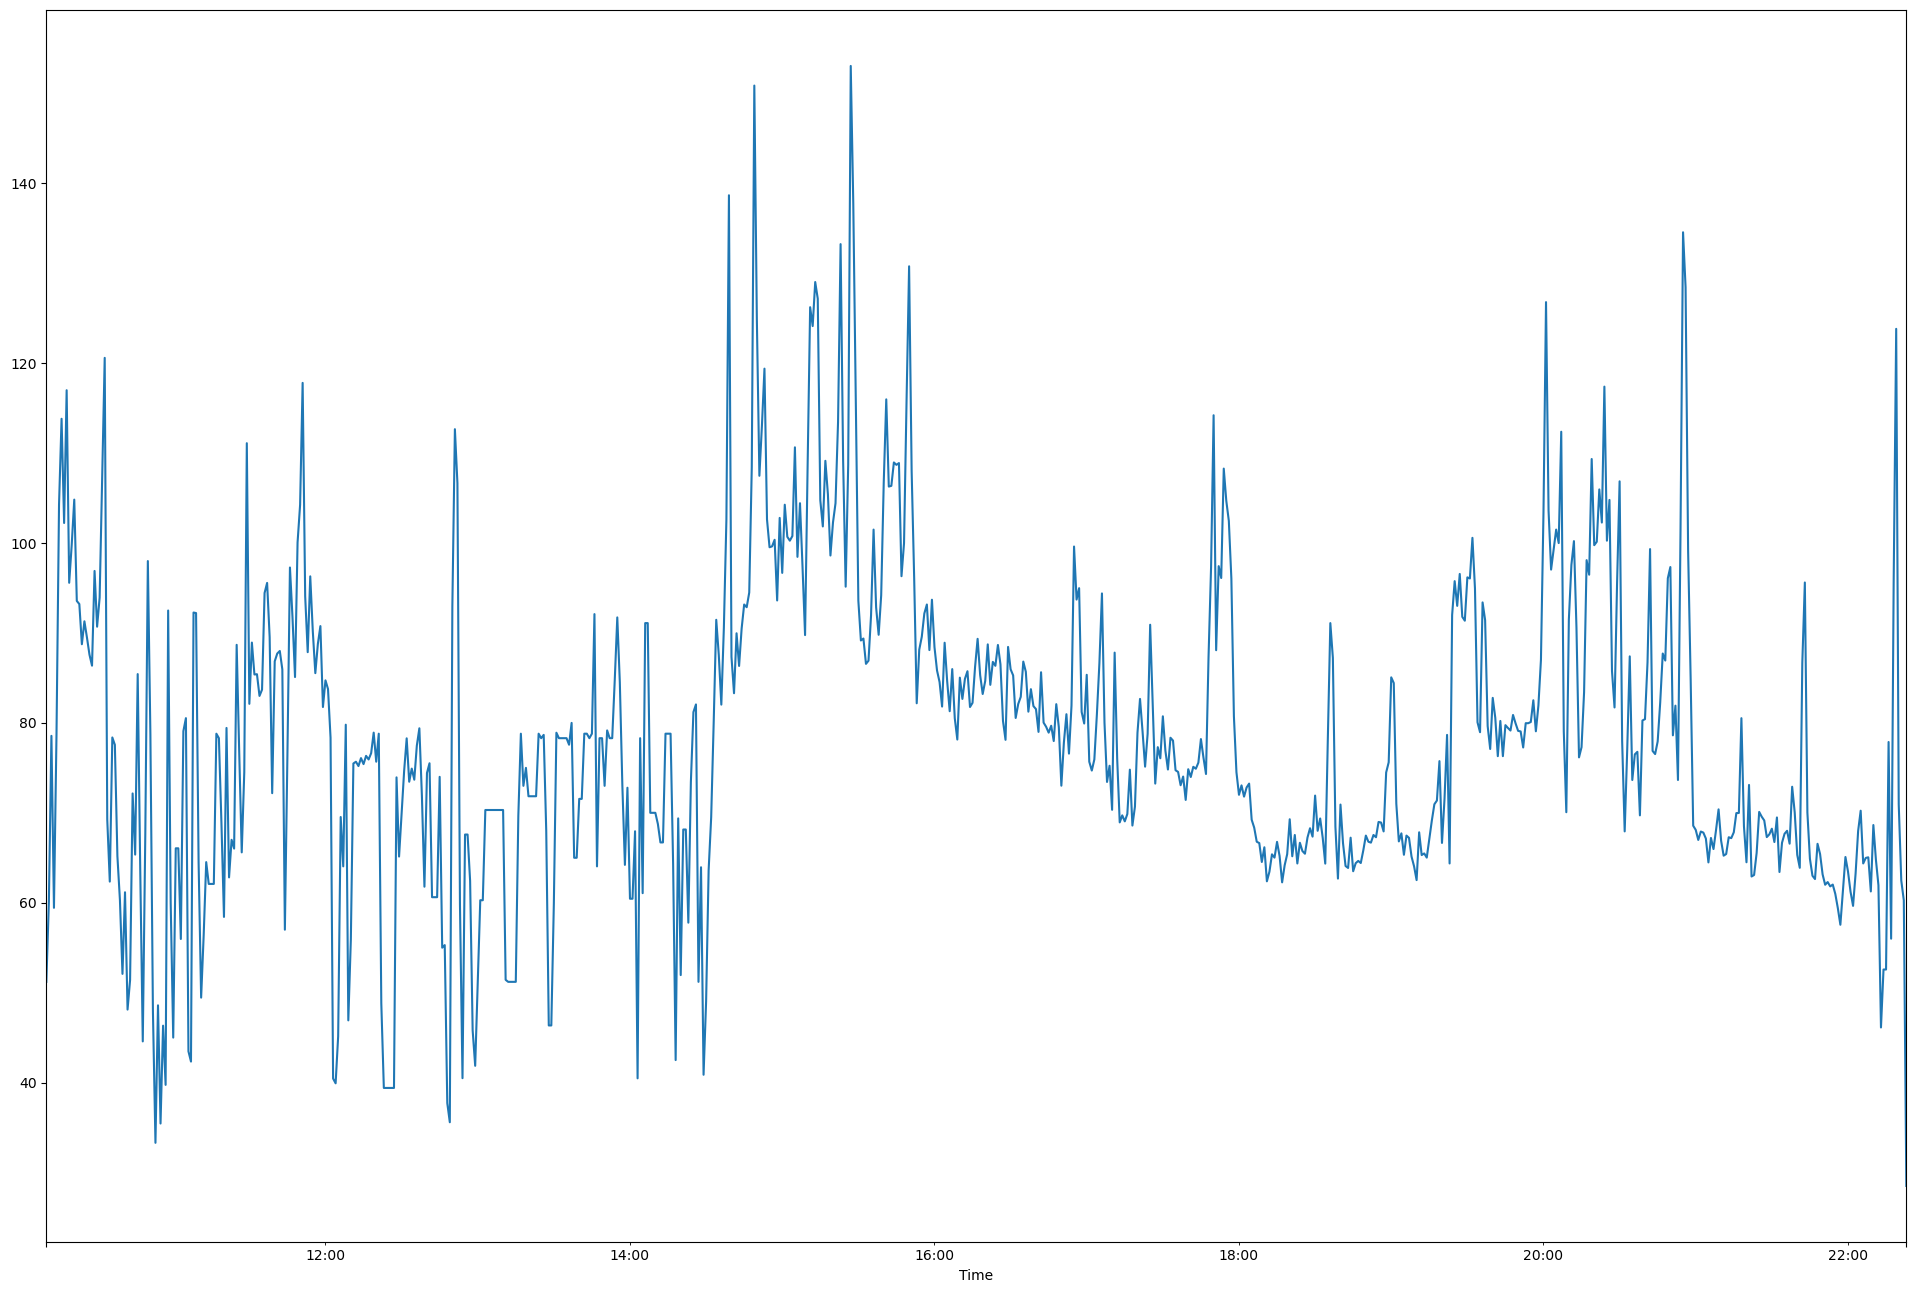

In [8]:
data["HR"][data["HR"] < 25] = np.nan
#Skip a minute in to avoid the cold start problem
data["HR"][60:].resample("t").mean().ffill().plot();

### BR: Breathing Rate
1. **Range**: 4-70
2. **Units**: Breaths per minute
3. **Potential Errors**
    1. Spontaneous adjustment of strap tension or location, or abrupt changes in posture, talking, coughing etc 


Several breath cycles are necessary for initial breathing rate indication to stabilize (15 – 45 seconds)

I may drop *n* first data points to avoid the risk of cold starts and the harness put on wrong. 

In [9]:
data[["BR"]].describe()

,BR
count,44027.000000
mean,16.663100
std,5.577965
min,2.200000
25%,12.500000
50%,16.900000
75%,21.100000
max,52.100000


<AxesSubplot:ylabel='Count'>

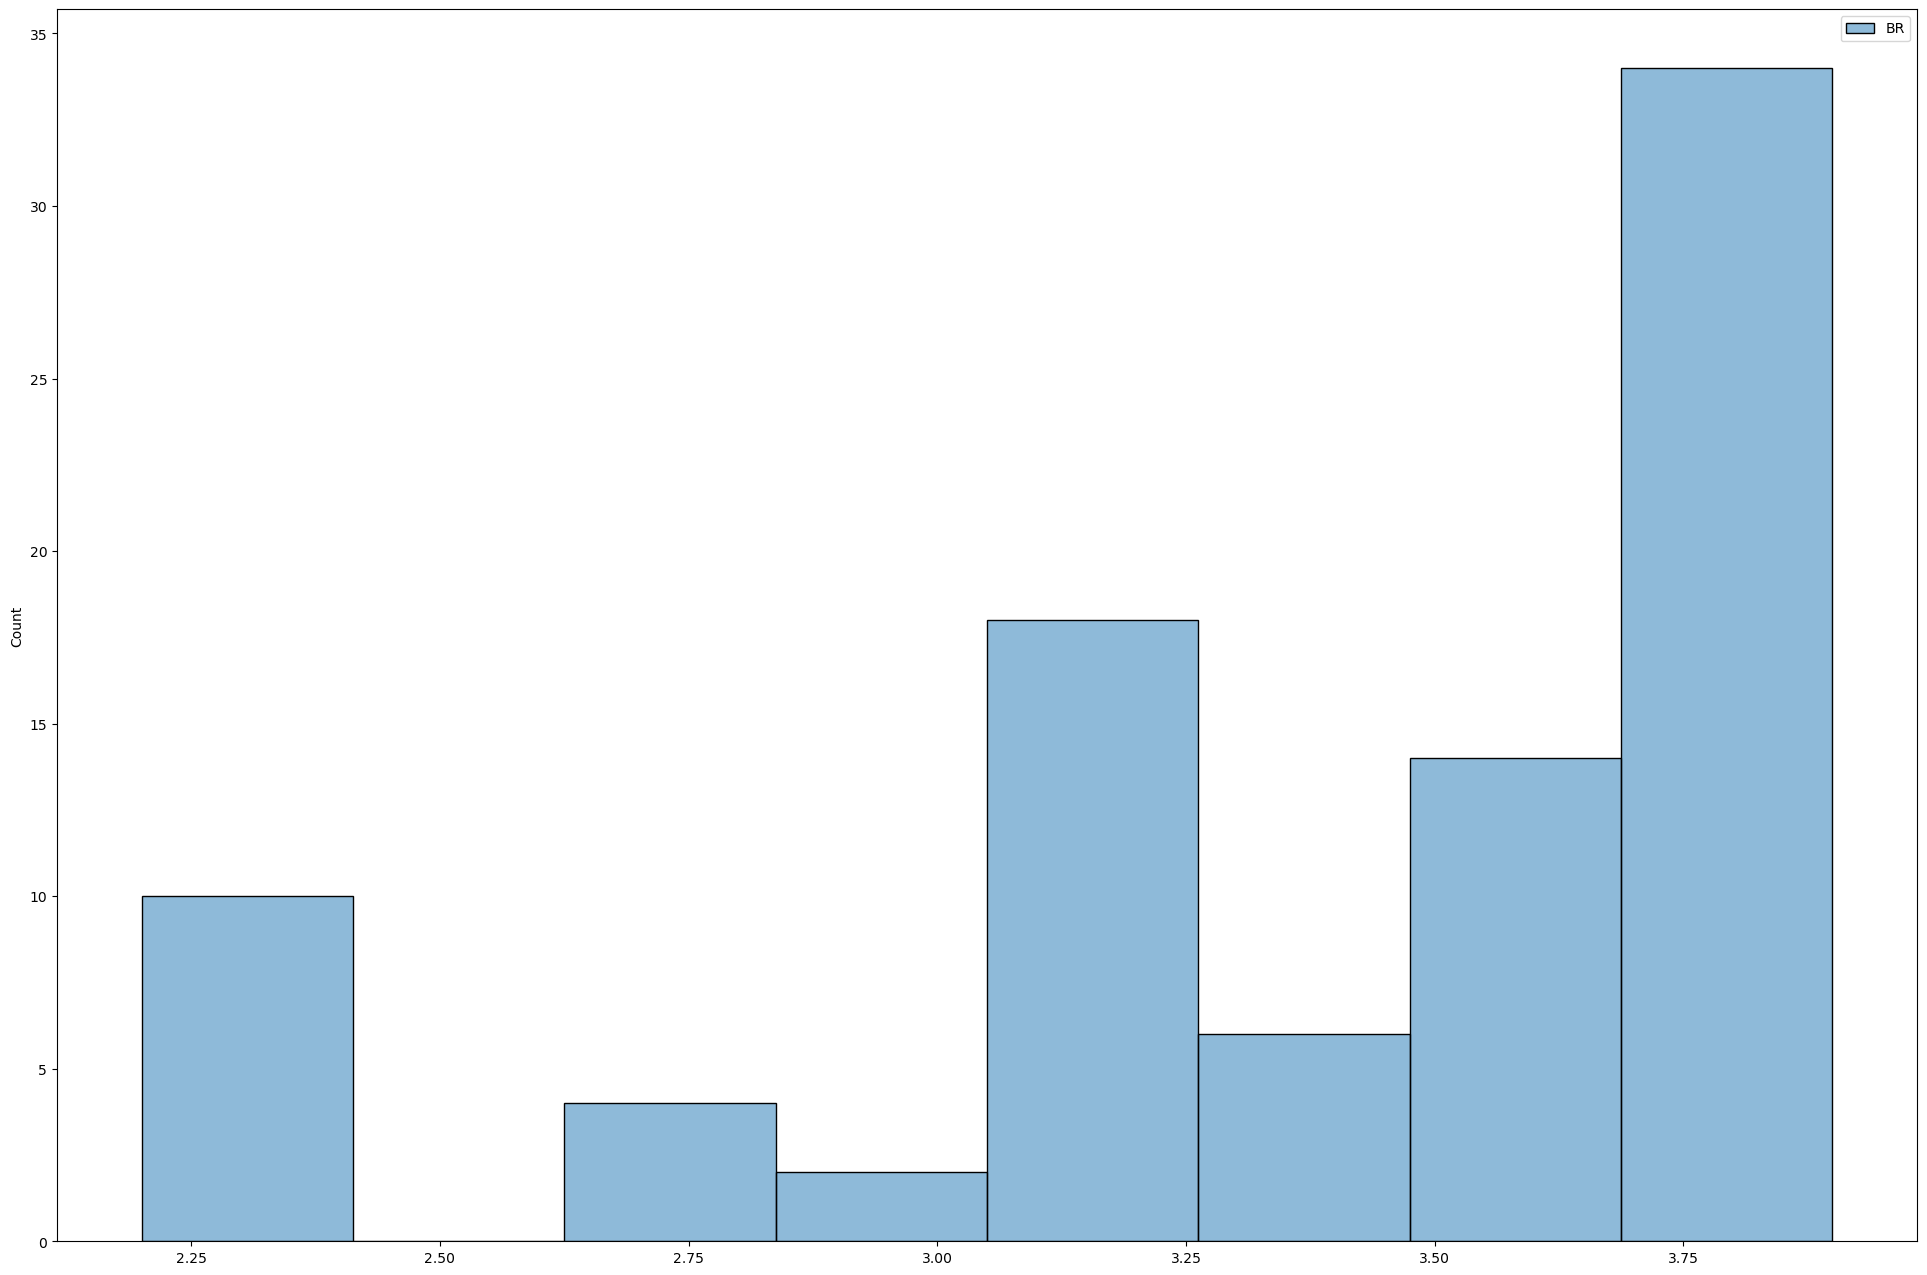

In [10]:
sns.histplot(data[["BR"]][data["BR"] < 4])

Some values fall below the lower limit of the range and none pass the upper limit.  

In comparison to HR there aren't as many values outside of the range and many are close to the lower limit.

For now I will imput np.nan but later I may change 

In [11]:
data[["BR"]][data["BR"] < 4] = np.nan

C:\Users\PC\AppData\Local\Temp\ipykernel_12388\1683137820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["BR"]][data["BR"] < 4] = np.nan
C:\Users\PC\AppData\Local\Temp\ipykernel_12388\1683137820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["BR"]][data["BR"] < 4] = np.nan


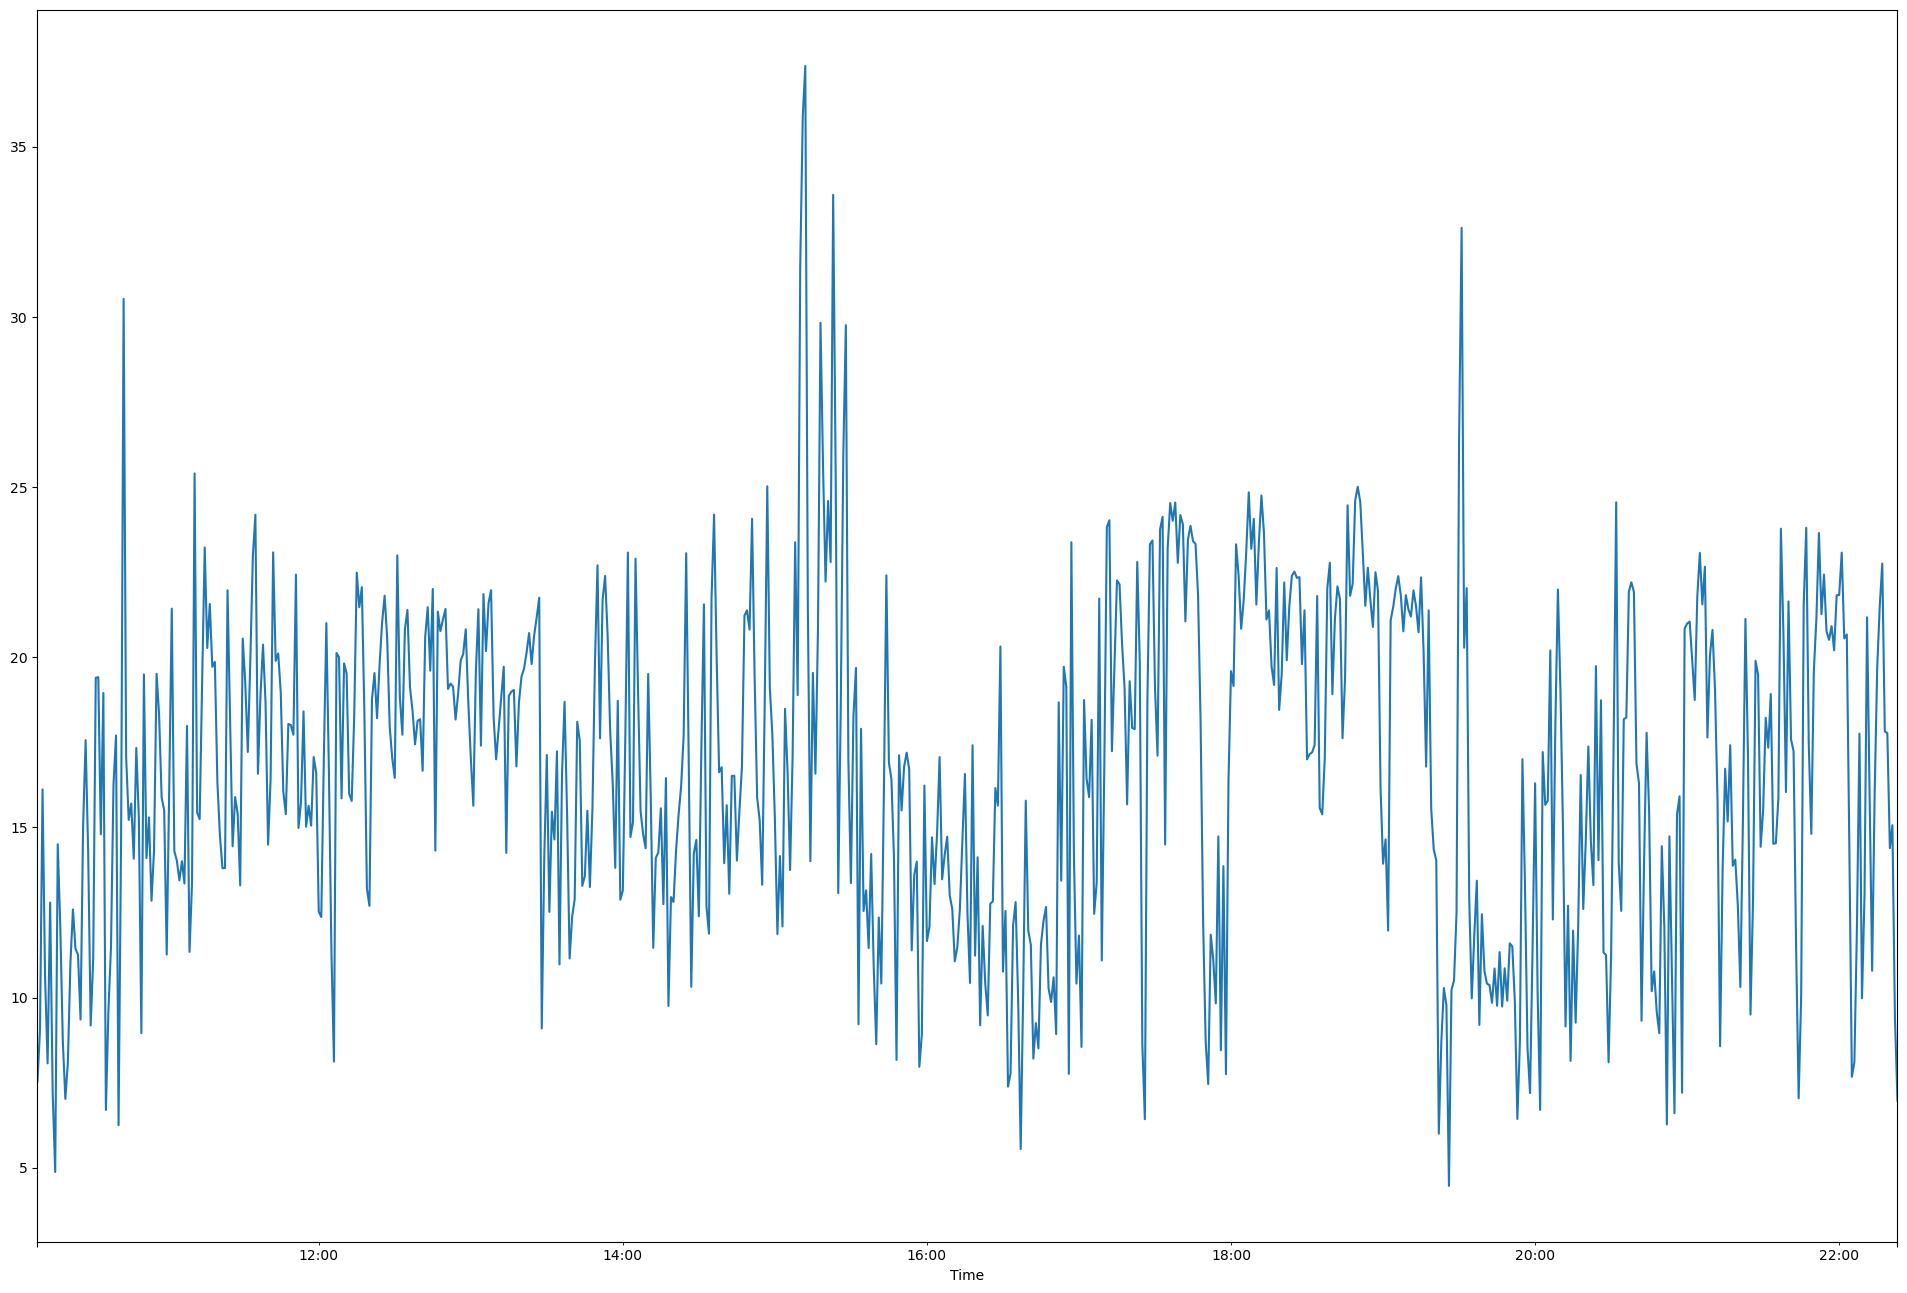

In [12]:
data["BR"].resample("t").mean().ffill().plot();

### Posture
1. **Range**: -+ 180
2. **Units**: Degrees from vertical

Extra notes
1. 0° = subject vertical
2. 90°=subject prone (face down)
3. -90°=subject supine (face up)
4. ±180°= subject inverted

There is likely to be an offset of ±5 -15° from 0 for a ‘vertical’ subject due to
variations in torso shape, and actual posture.

In [13]:
data[["Posture"]].describe()

,Posture
count,44027.000000
mean,-18.418289
std,20.976574
min,-124.000000
25%,-26.000000
50%,-21.000000
75%,-14.000000
max,124.000000


<AxesSubplot:ylabel='Count'>

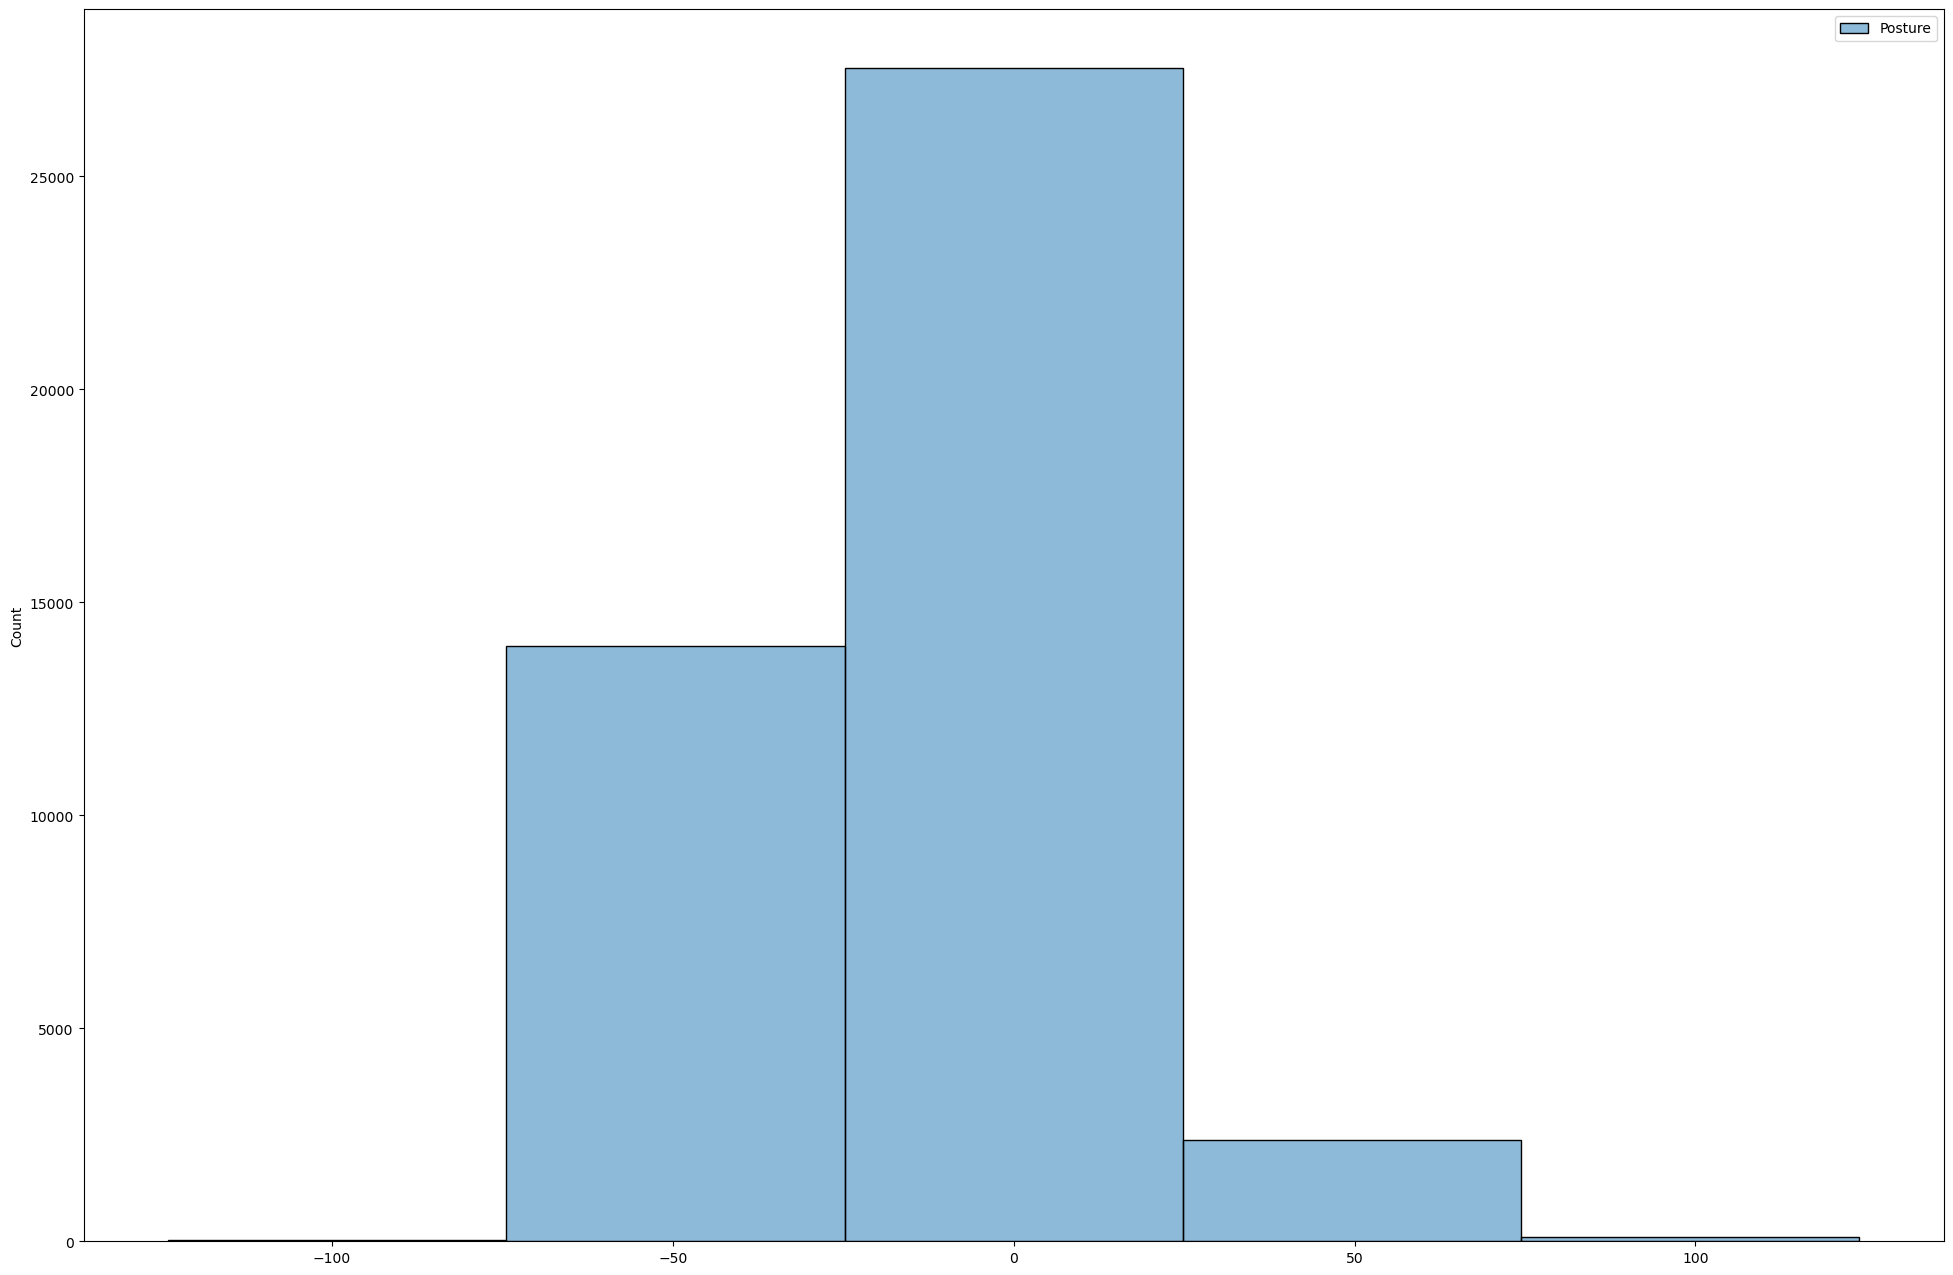

In [14]:
sns.histplot(data[["Posture"]], bins=5)

Subject seems to spend most of their time with a vertical posture or lying down (facing up).

Look into one_hot_encoding into the possible positions.

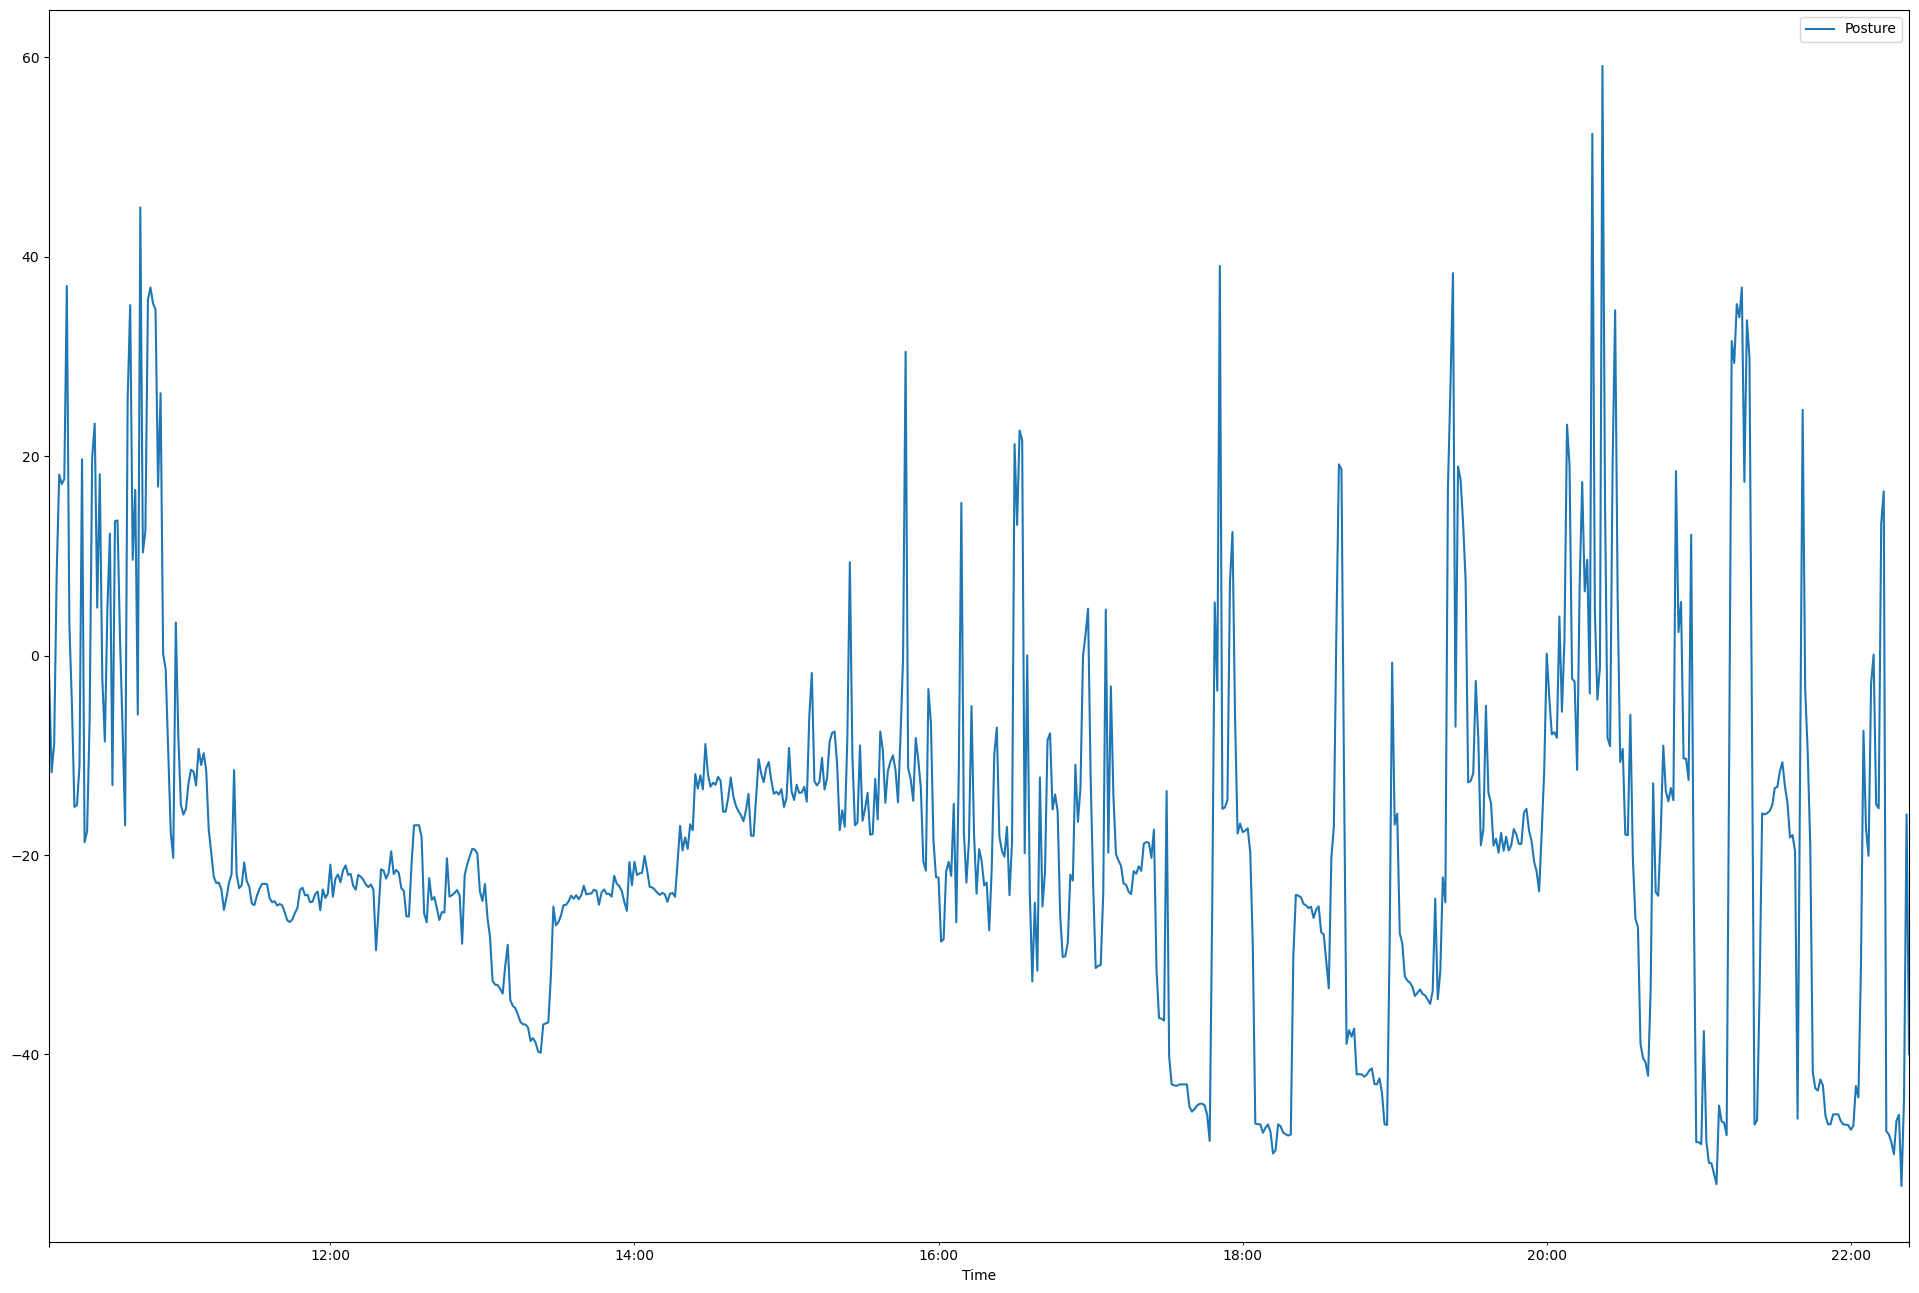

In [15]:
data[["Posture"]].resample("t").mean().plot();

### Activity
1. **Range**: 0 - 16
2. **Units**: Vector Magnitude Units, measured in g. VMU = ||(x,y,z)||, then averages of the three axial acceleration magnitudes over the previous 1 second, sampled at 100Hz

Extra notes
1. Walking ~ 0.2 VMU or greater
2. Jogging ~ 0.8 VMU or greater

In [16]:
data[["Activity"]].describe()

,Activity
count,44027.000000
mean,0.054058
std,0.090310
min,0.000000
25%,0.010000
50%,0.020000
75%,0.050000
max,1.480000


In [17]:
data[["Activity"]].value_counts().head()

Activity
0.01        18221
0.02        10109
0.03         2683
0.04         1750
0.05         1385
dtype: int64

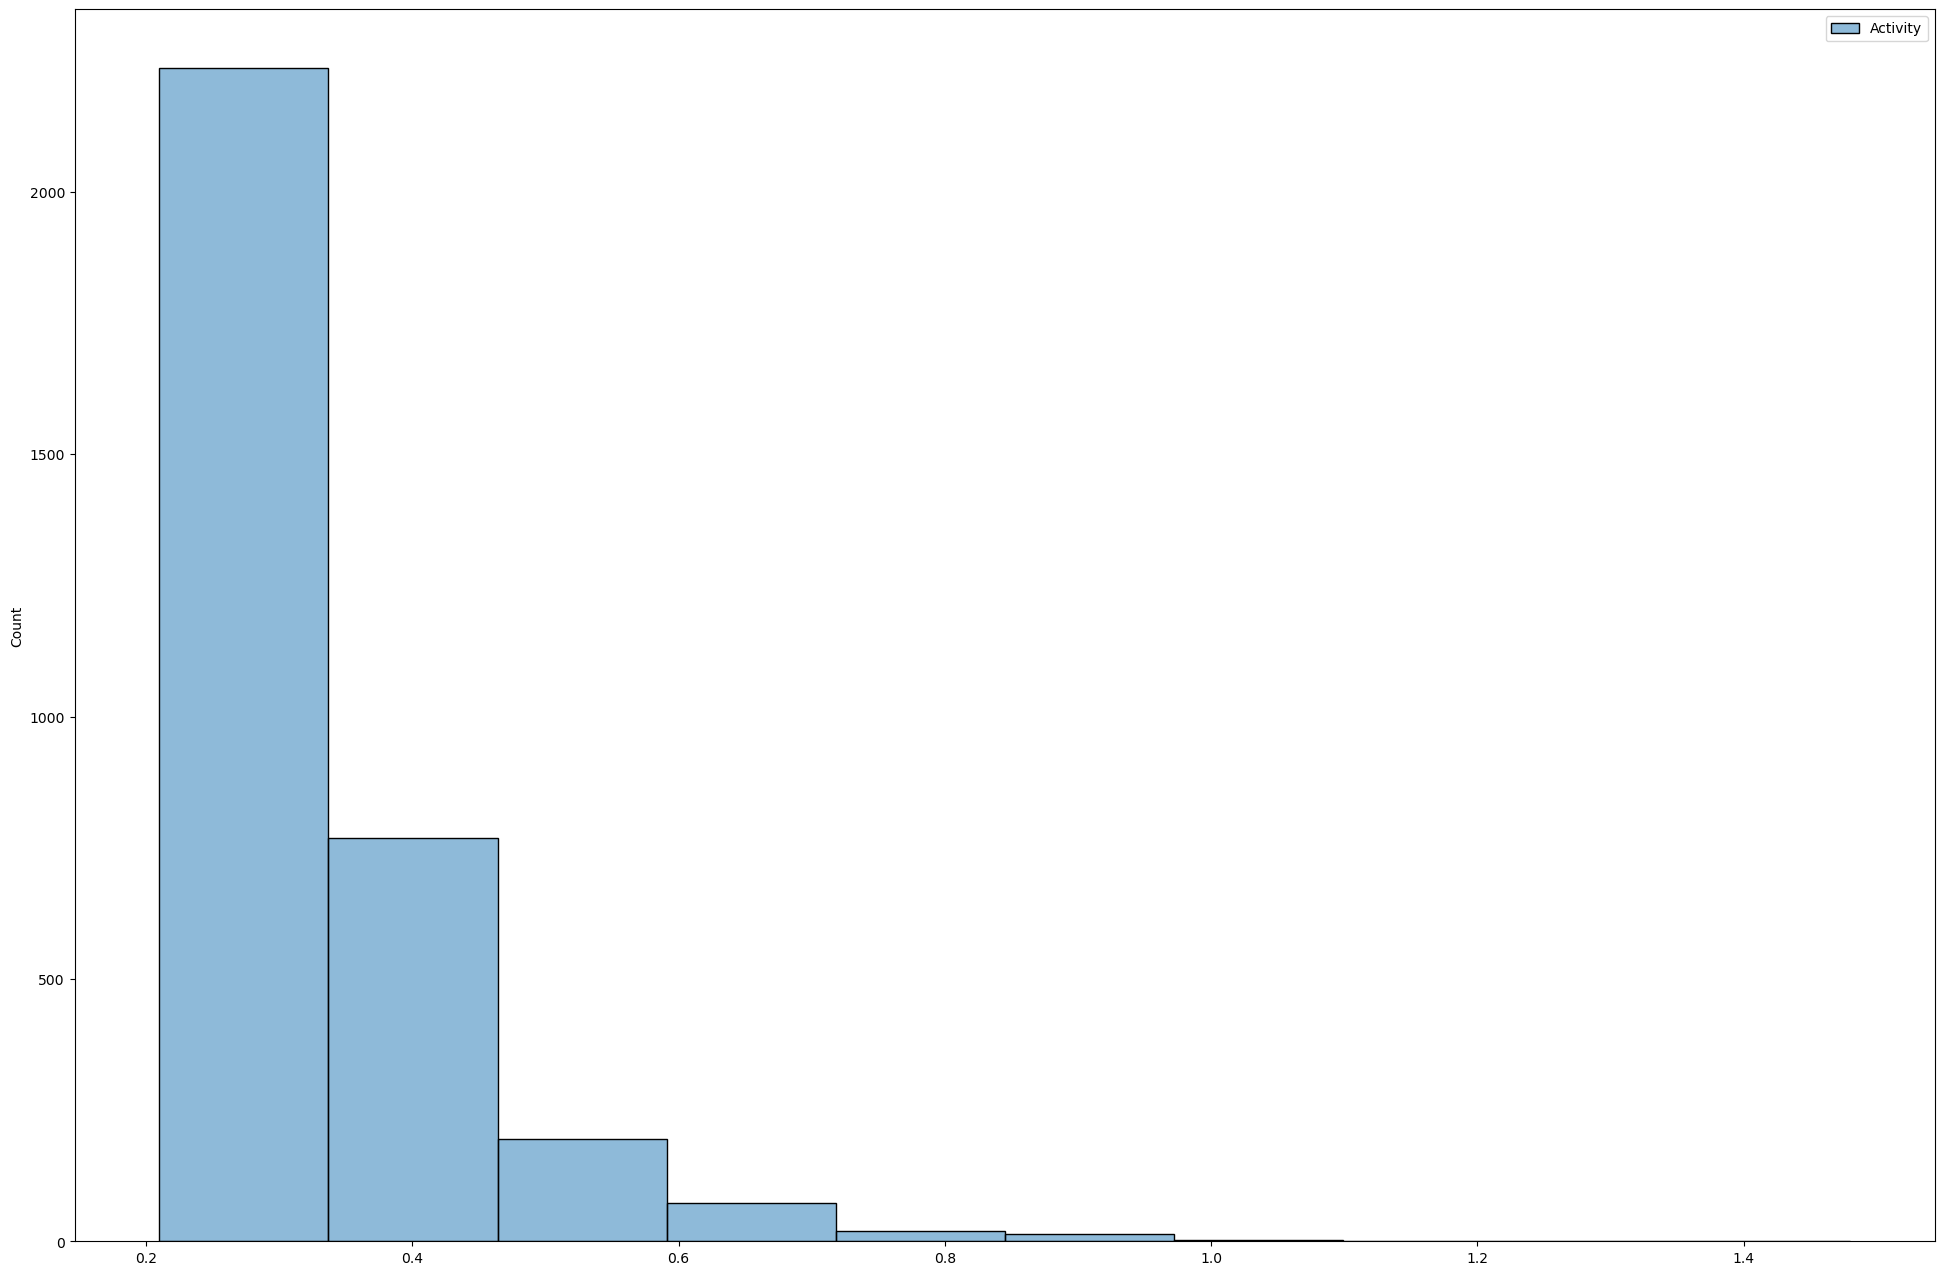

In [18]:
sns.histplot(data[["Activity"]][data["Activity"] > 0.2], bins=10);

User does not do much activaty apart from a small bit of walking

### Peak Acceleration

1. **Range**: 0 - 16
2. **Units**: Vector Magnitude Units, measured in g. VMU = ||(x,y,z)||

Extra notes
1. Walking ~ 0.2 VMU or greater
2. Jogging ~ 0.8 VMU or greater

In [19]:
# I am interested to see how different the peak is from the average. For this I calculated the mean squared error.

mse(data[["PeakAccel"]], data[["Activity"]])

0.014052722193199628

As you can see on average there isn't a huge difference for this example.   
Since the Activity column may be a smoother value without some noise I may drop PeakAccel later on but for now I will leave it.

In [20]:
data[["PeakAccel"]].describe()

,PeakAccel
count,44027.000000
mean,0.119244
std,0.175813
min,0.010000
25%,0.040000
50%,0.060000
75%,0.120000
max,7.550000


In [21]:
data[["PeakAccel"]].value_counts().head()

PeakAccel
0.04         11330
0.03          9740
0.06          4964
0.07          1892
0.08          1476
dtype: int64

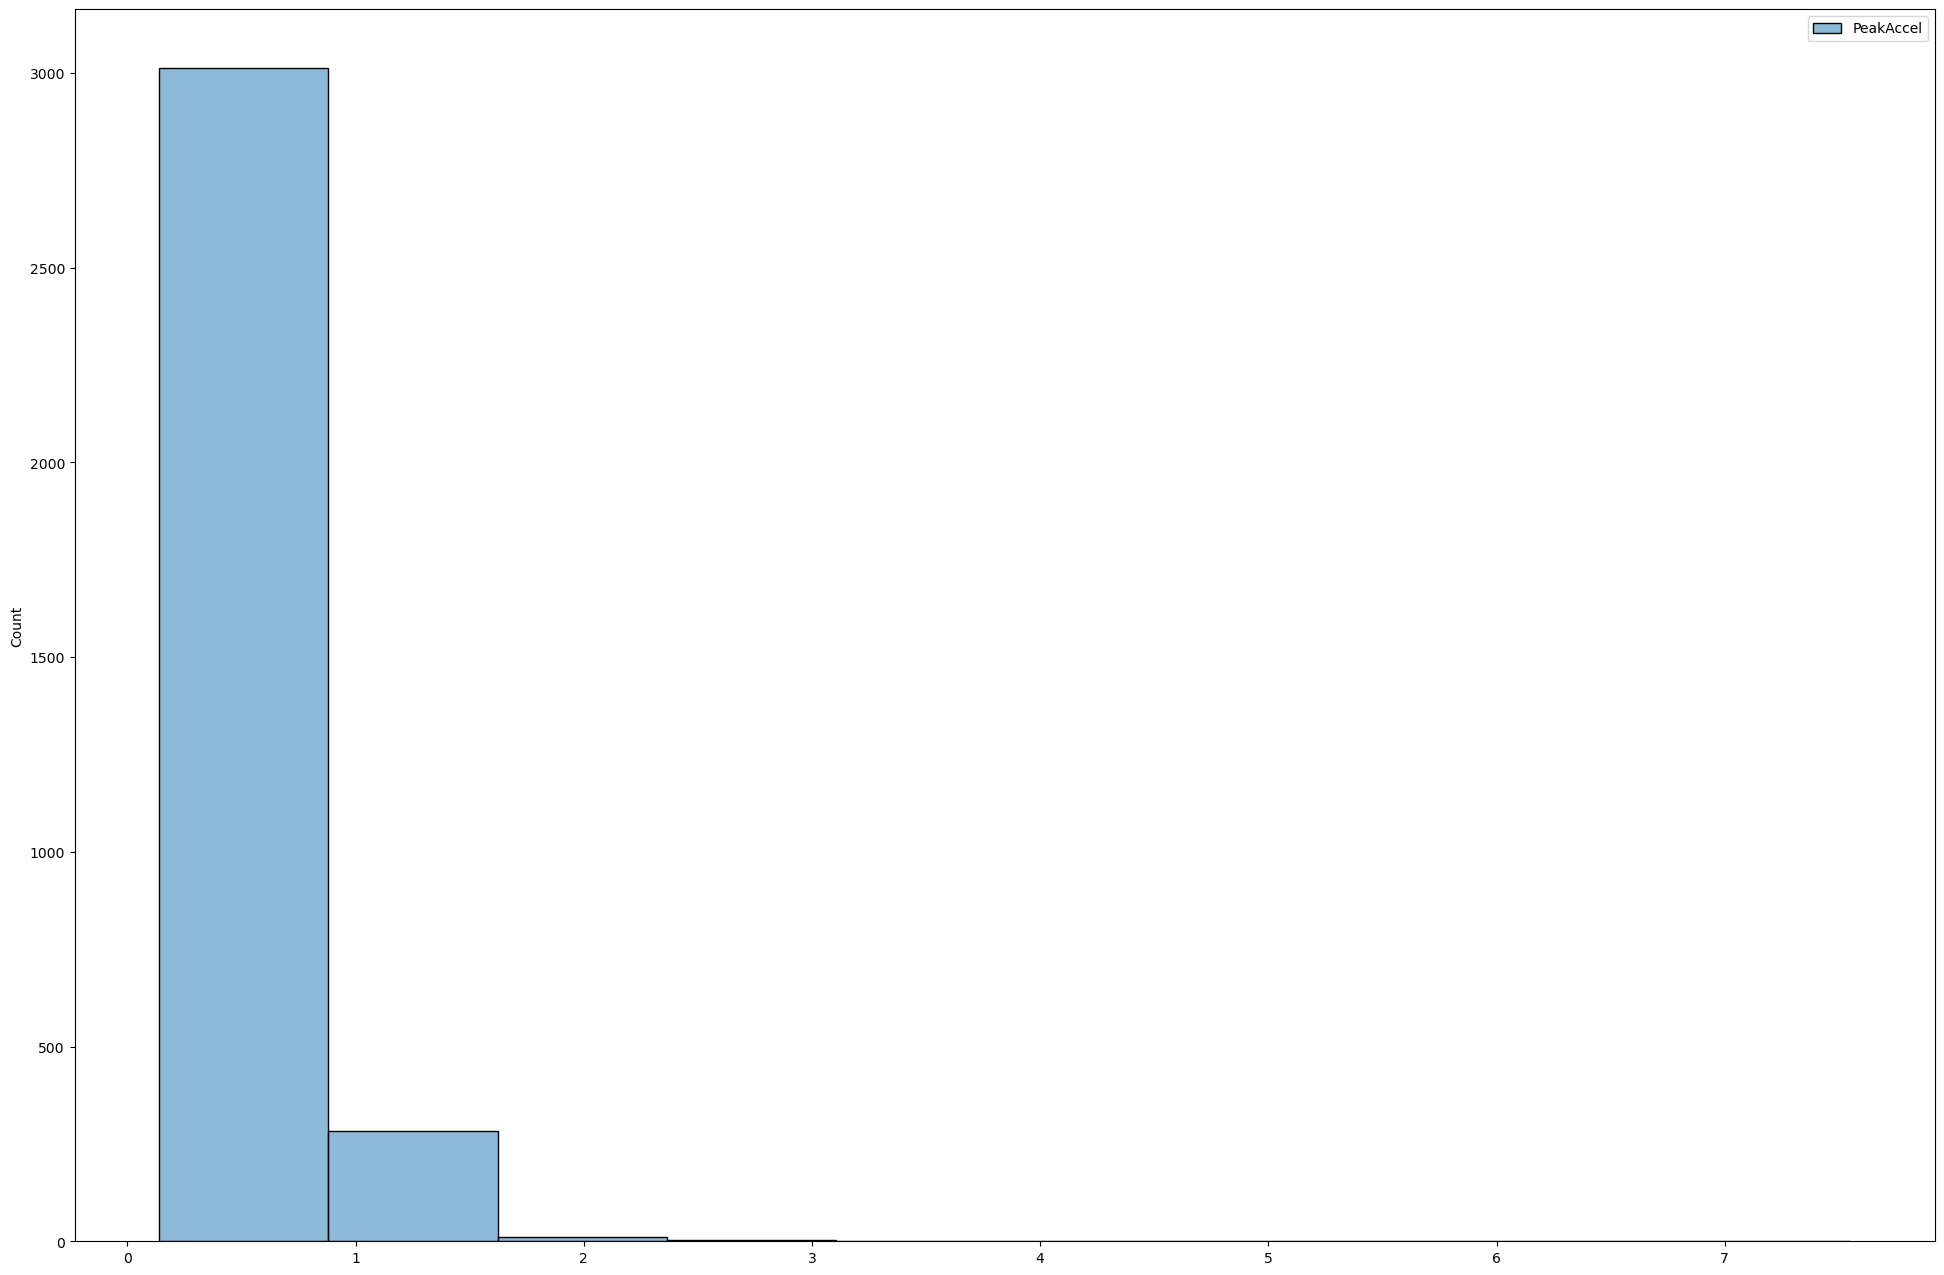

In [22]:
sns.histplot(data[["PeakAccel"]][data["Activity"] > 0.2], bins=10);

<AxesSubplot:xlabel='Time'>

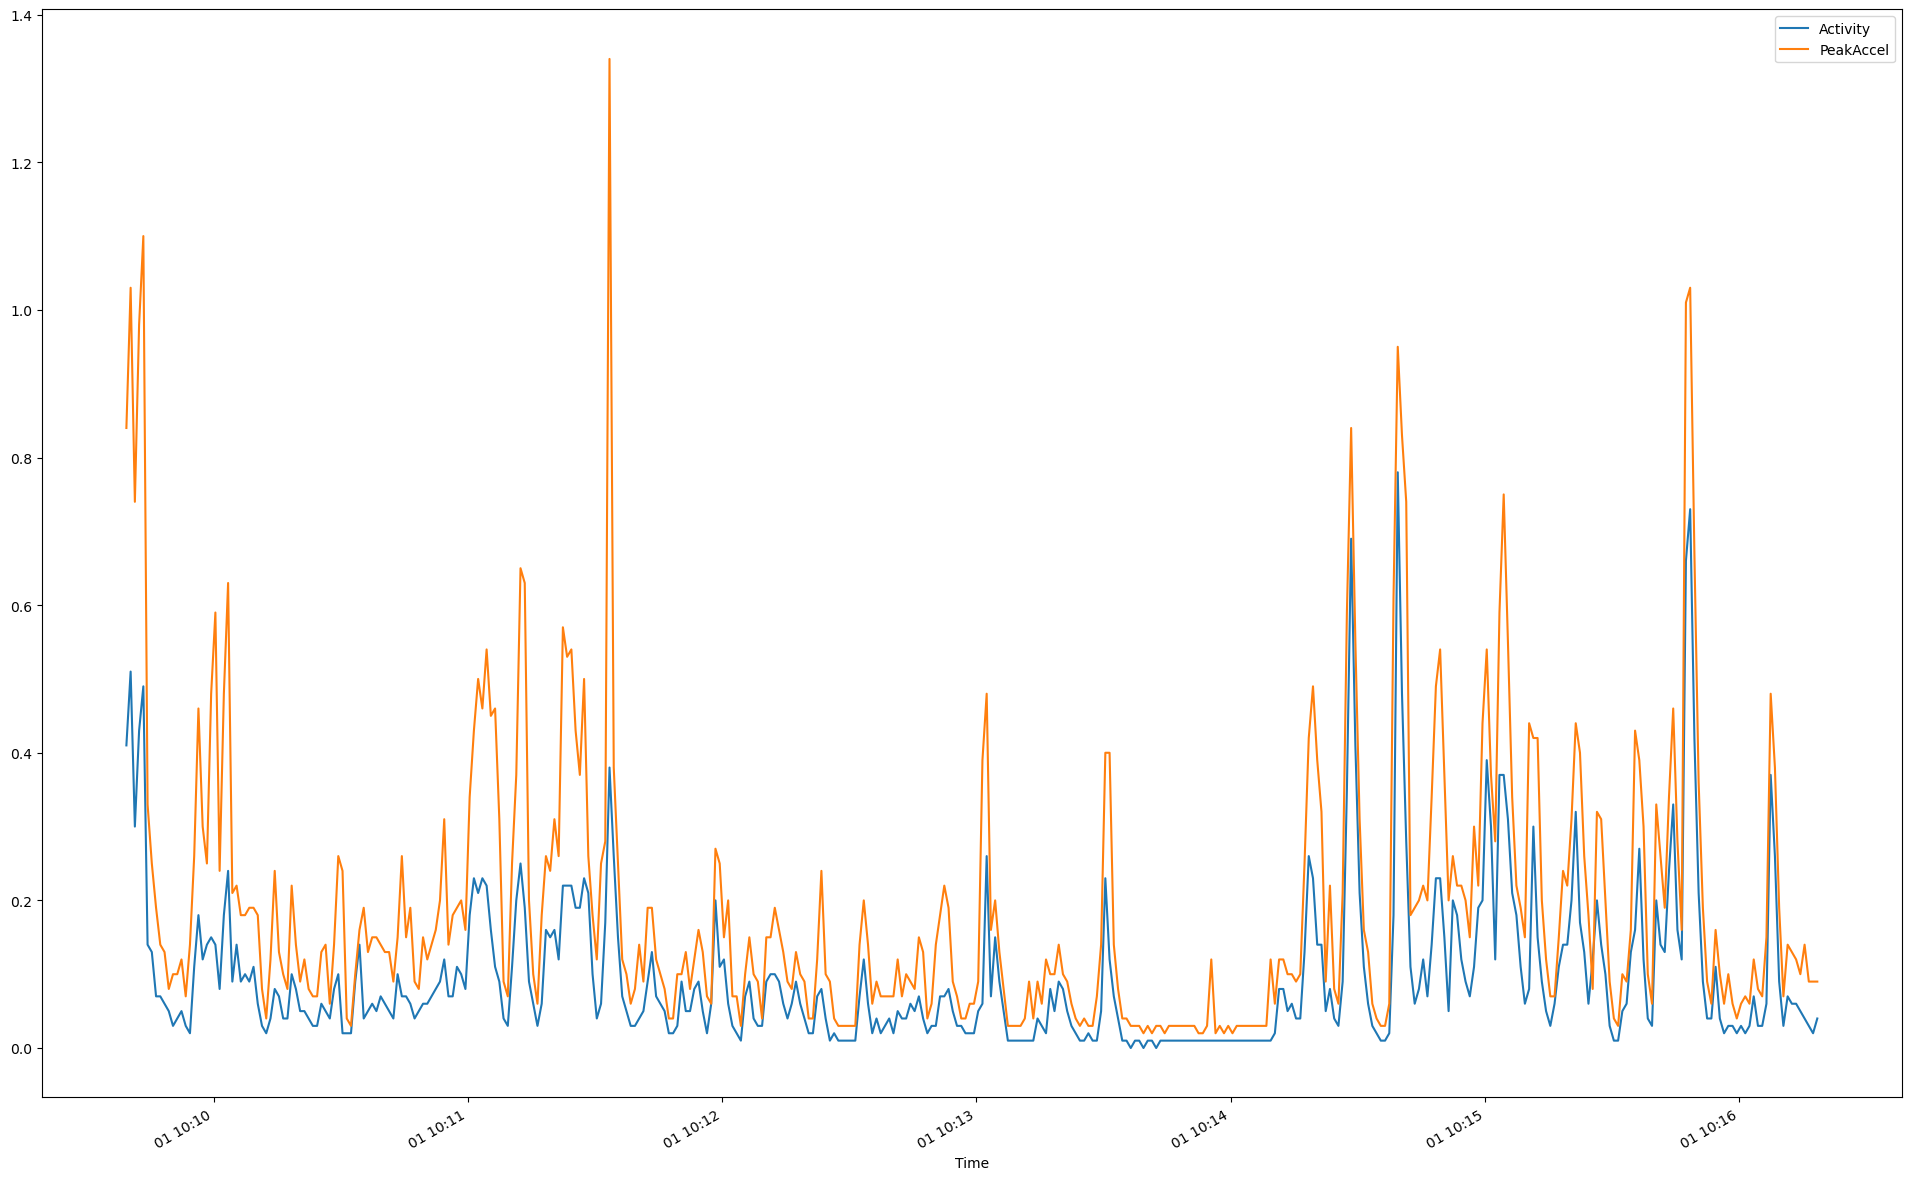

In [23]:
data[["Activity", "PeakAccel"]][:400].plot()

In [24]:
data[["Activity", "PeakAccel"]].corr()

,Activity,PeakAccel
Activity,1.000000,0.921495
PeakAccel,0.921495,1.000000


The line graphs look pretty similiar, the peaks may be valueable when looking at the change in heart rate or breathing rate but I may drop this feature since it does not add too much more infromation.

### Battery Voltage

1. **Range**: ~ 3.6 to ~ 4.2 for a functioning battery
2. **Units**: Volts

Extra notes
1. Fully charged ~ 4.2V
2. Fully discharged ~ 3.6V

In [25]:
data[["BatteryVolts"]].describe()

,BatteryVolts
count,44027.000000
mean,3.940722
std,0.112854
min,3.781000
25%,3.836000
50%,3.932000
75%,4.040000
max,4.161000


For this example the battery remained in the functional range.  
I do expect to gain to much information on the user due to the BatteryVolts,   
but it could explain outliers in the data for some users if the BatteryVolts falls bellow the lower limit.

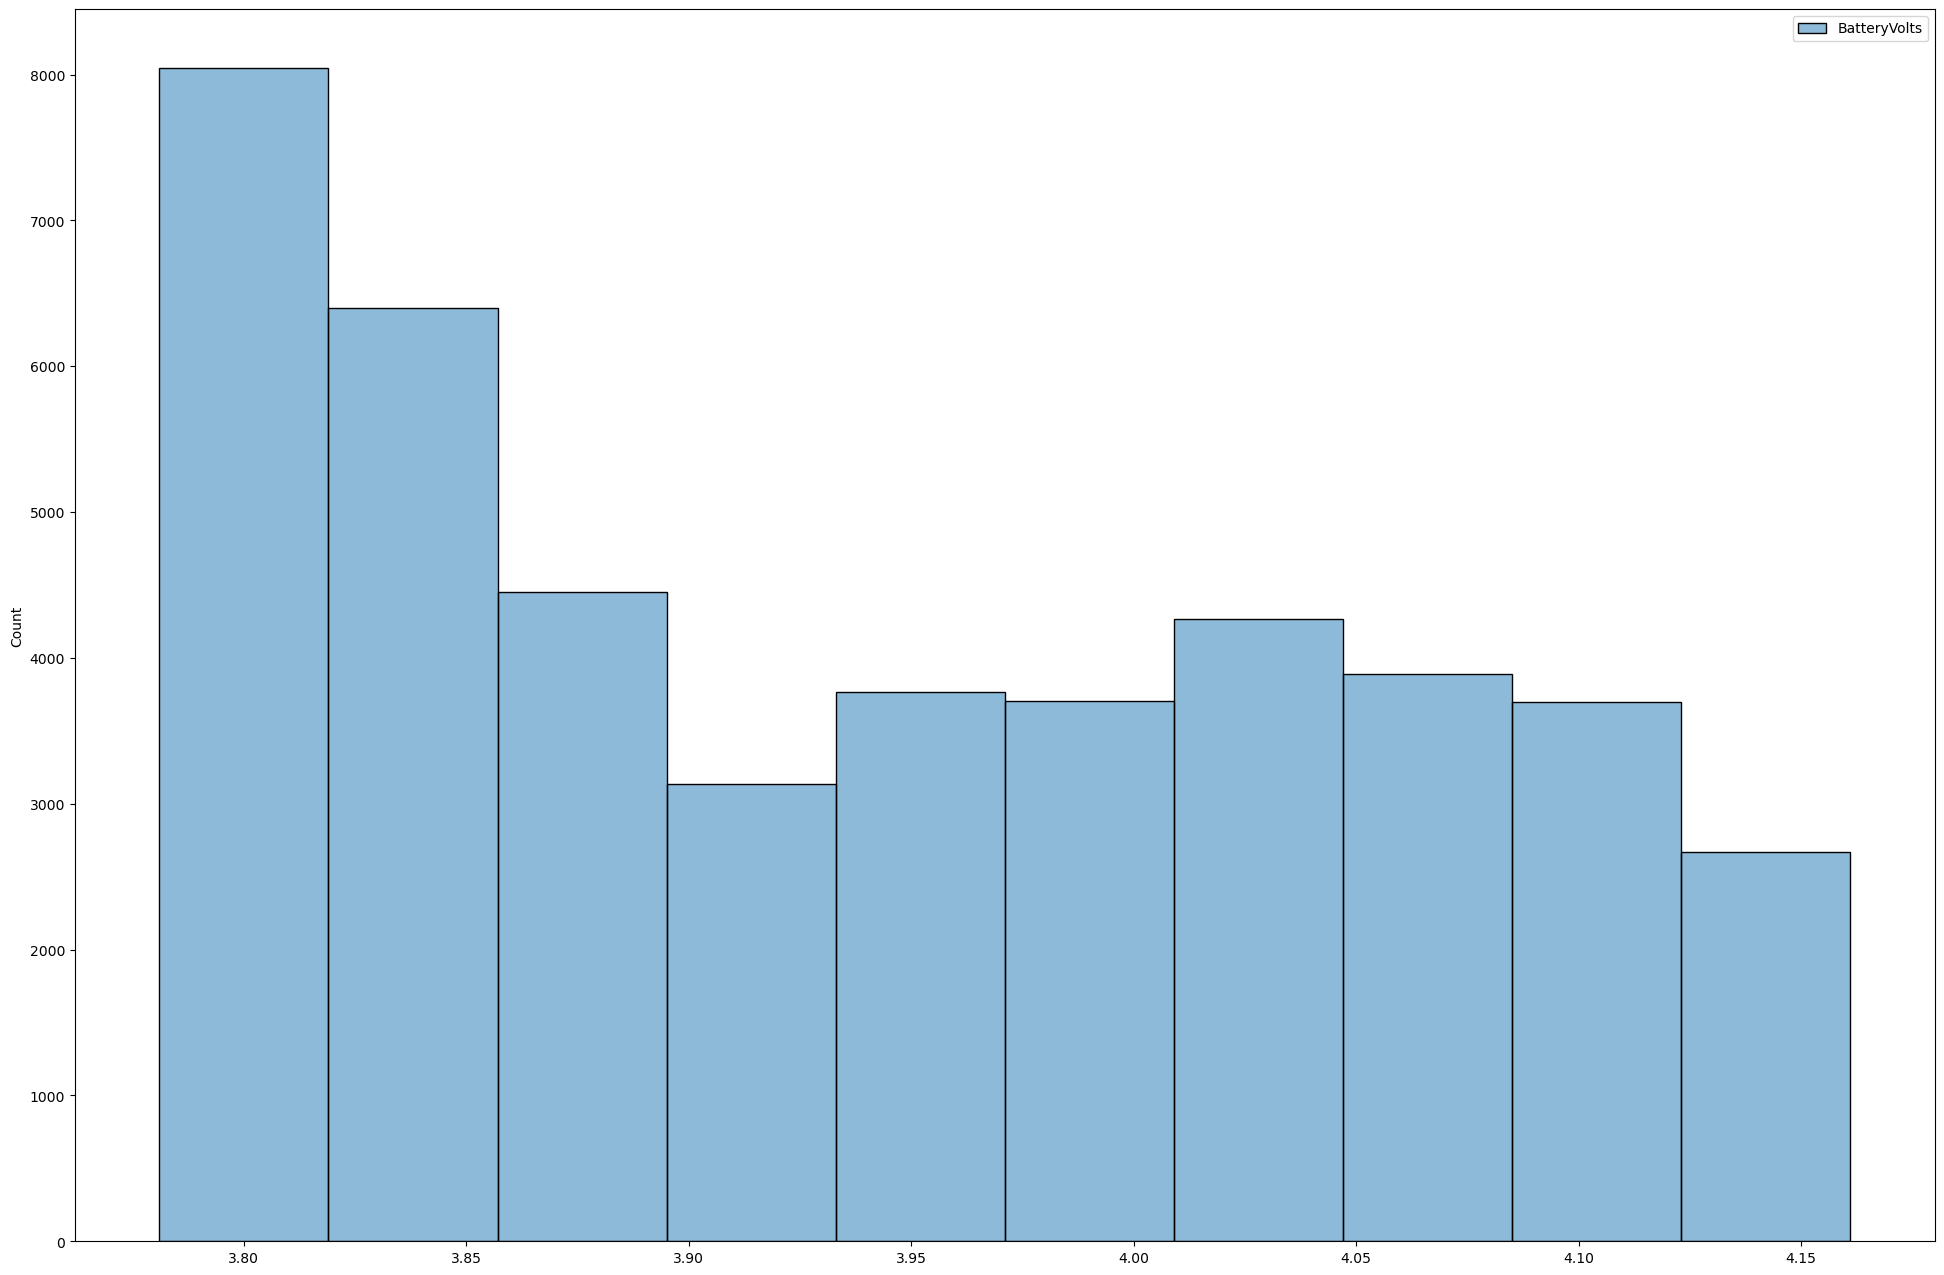

In [26]:
sns.histplot(data[["BatteryVolts"]], bins=10);

<AxesSubplot:xlabel='Time'>

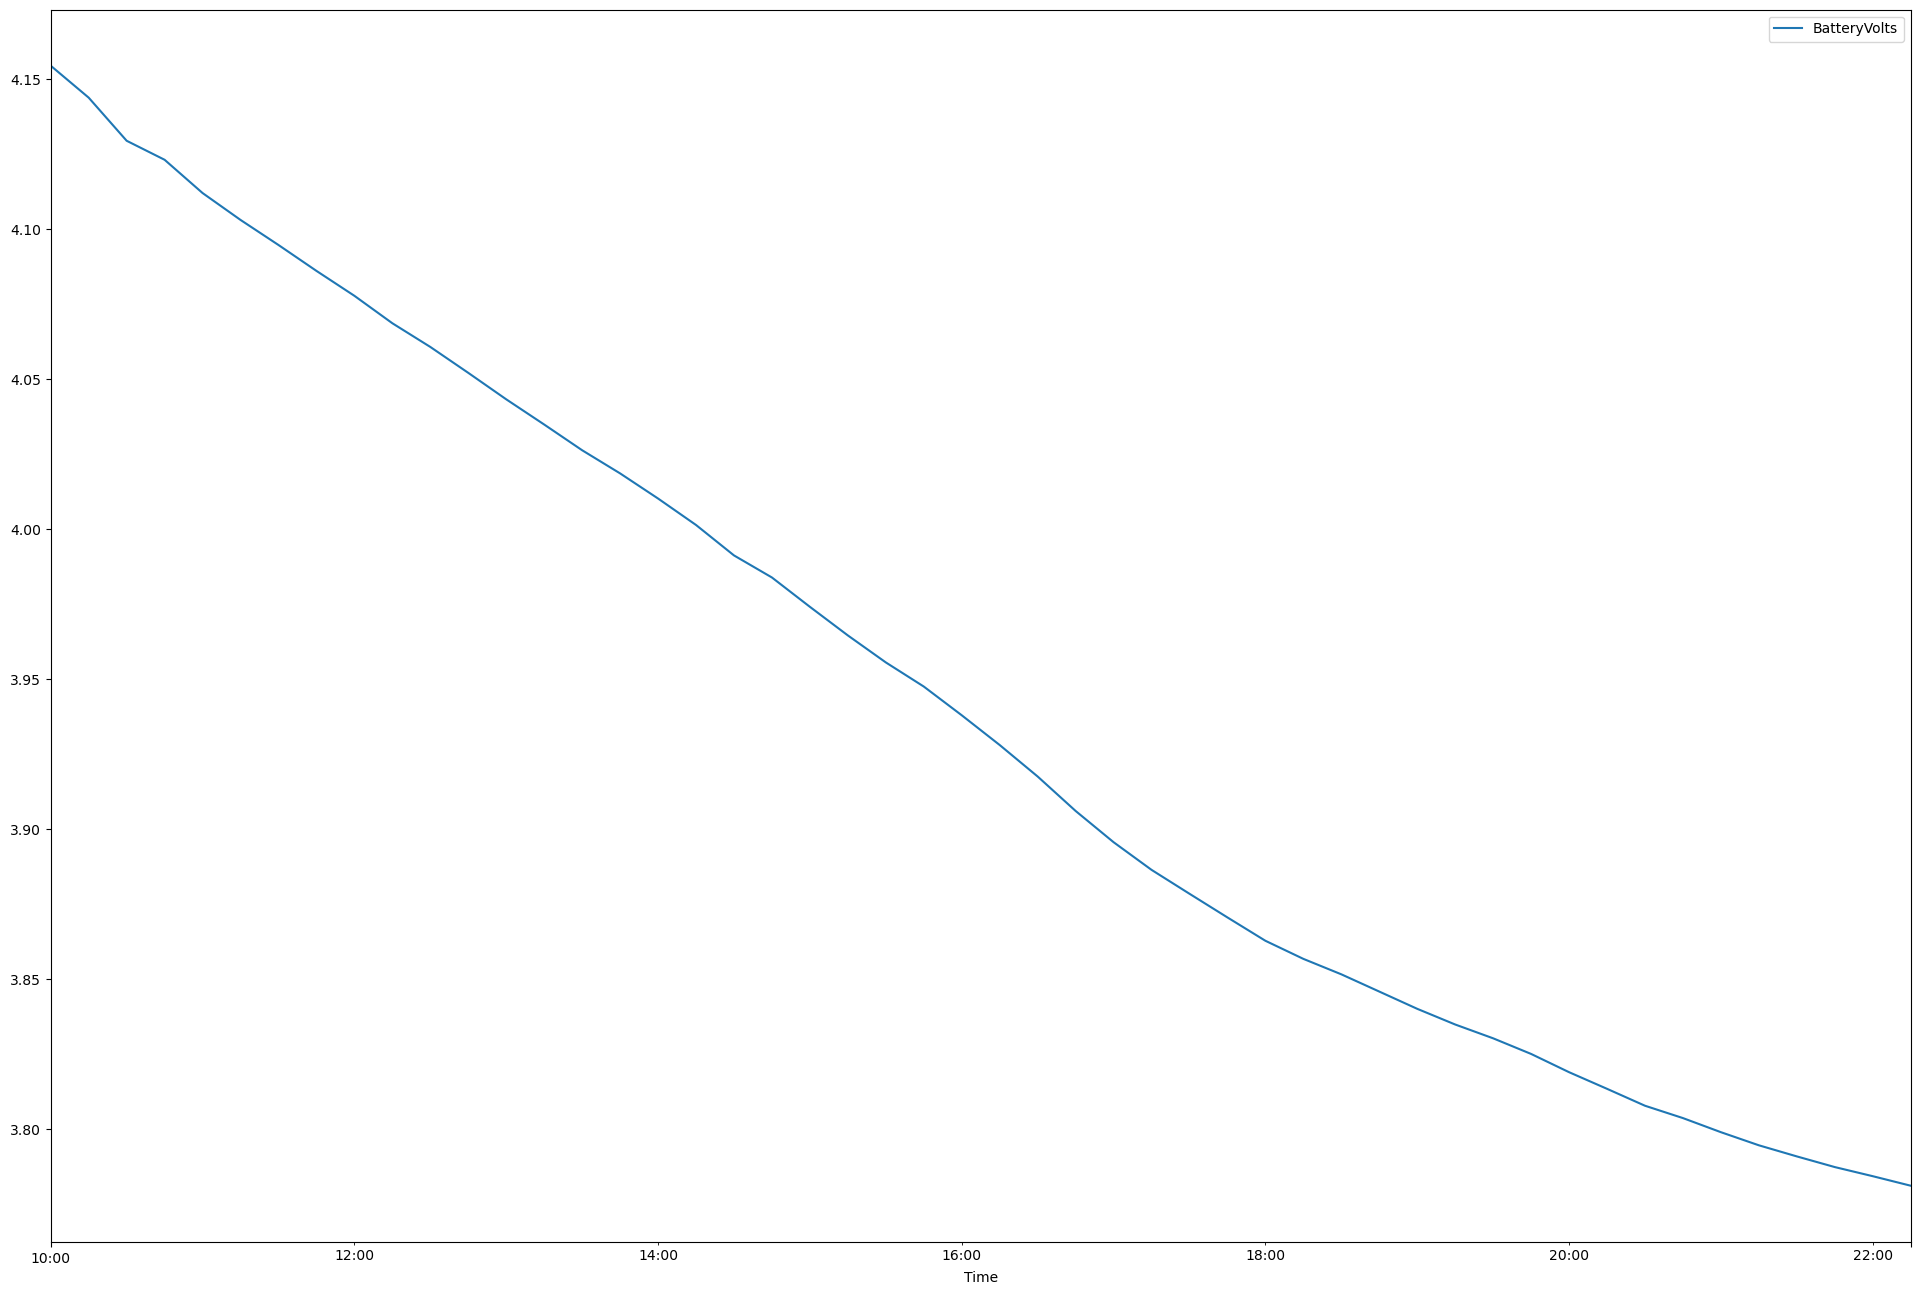

In [27]:
data[["BatteryVolts"]].resample("15T").mean().plot()

### Battery Level

1. **Range**: 0 - 1
2. **Units**: Percentage of battery left.

Extra notes
1. Fully charged = 1 ~ 4.2V
2. Empty charge = 0 ~ 3.6V

If battery discharged curves are stored historically, battery health can be
monitored.


Similar to battery voltage

<AxesSubplot:xlabel='Time'>

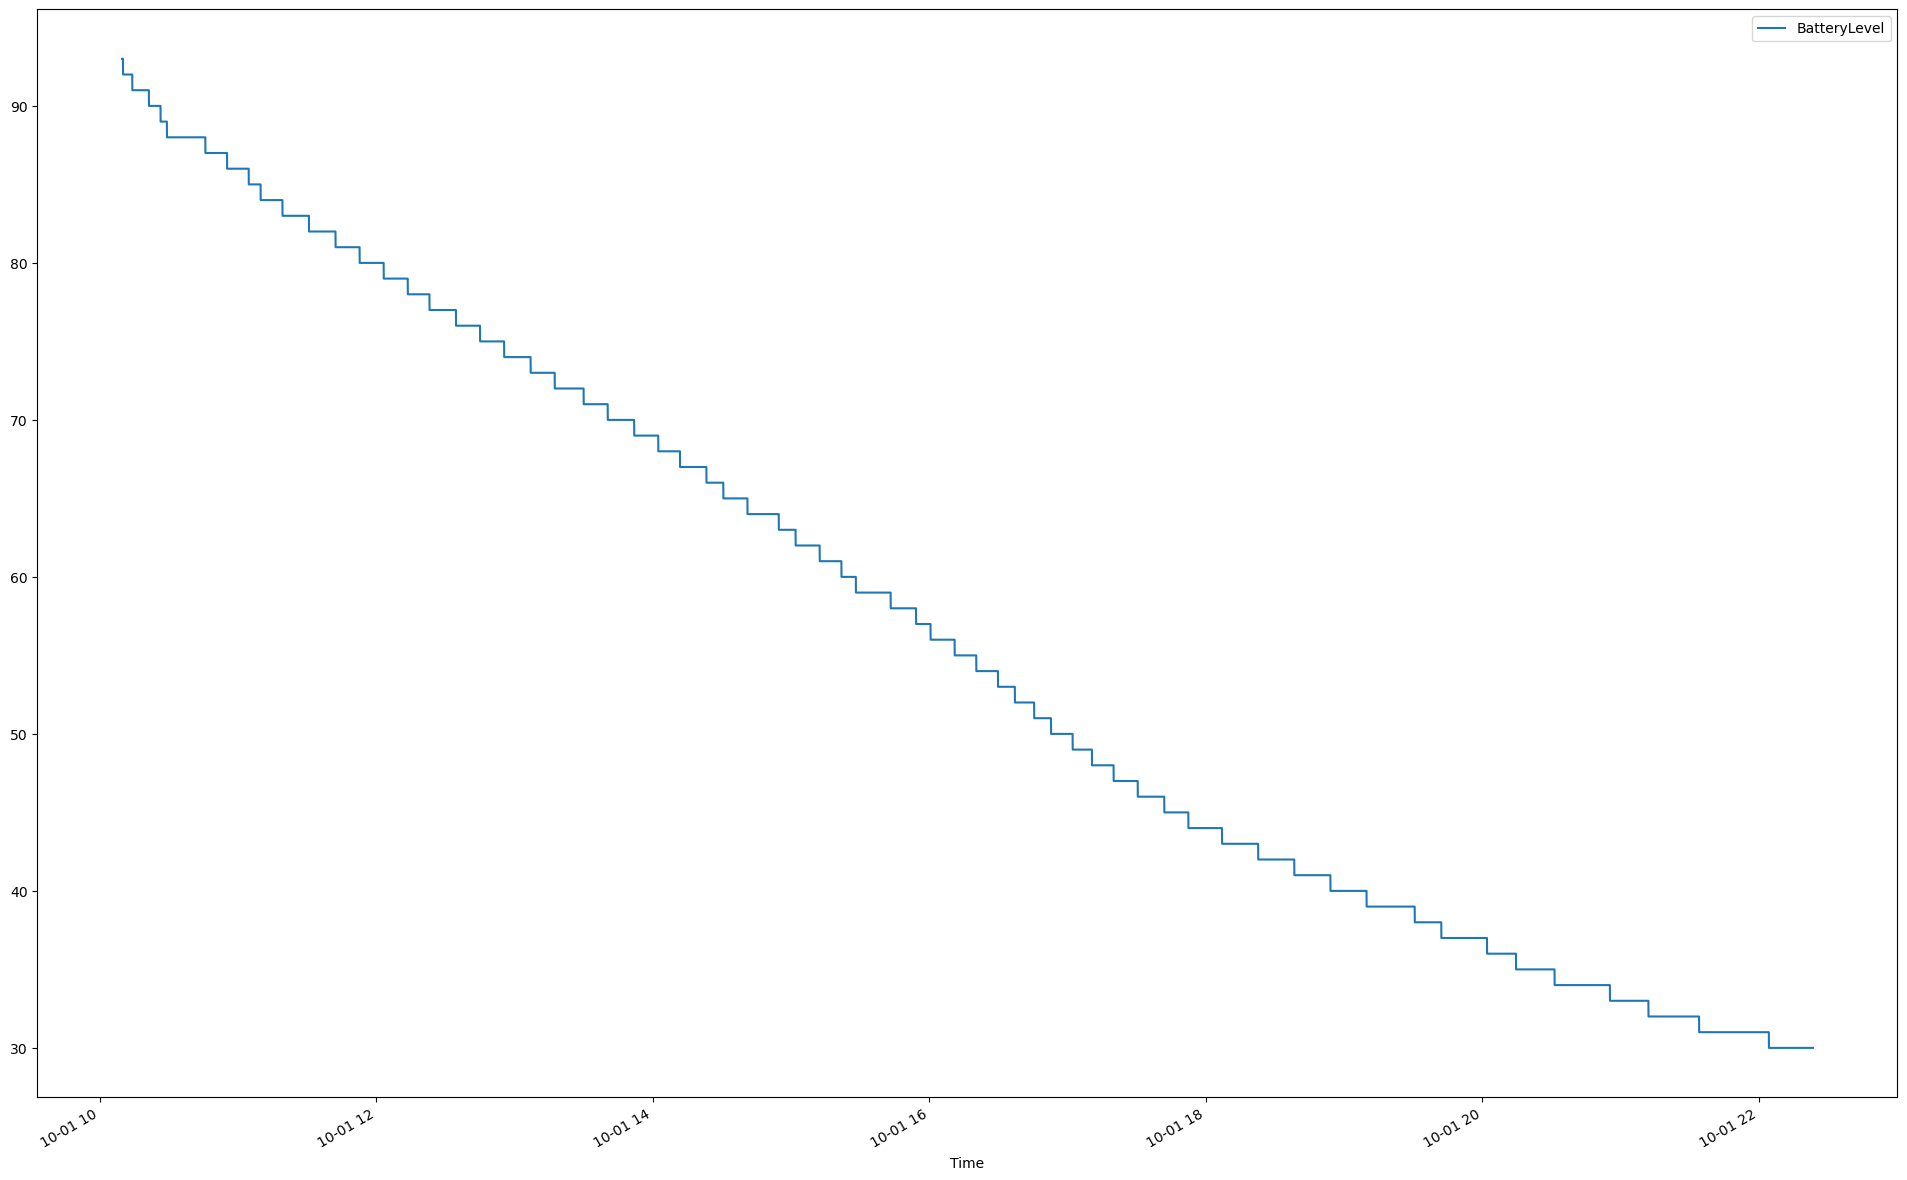

In [28]:
data[["BatteryLevel"]].plot()

As expected the longer the sensor is being used the lower the battery gets.

In [29]:
data[["BatteryVolts","BatteryLevel"]].corr()

,BatteryVolts,BatteryLevel
BatteryVolts,1.000000,0.999886
BatteryLevel,0.999886,1.000000


In [30]:
data.drop(columns=["BatteryVolts"],inplace=True)

### BR Amplitude


1. **Range**: 0 - 65534
2. **Units**: 16 bit unsigned number

Extra notes

This is a metric extracted from the breathing detection algorithm, and is used for
internal development only. Initial value is large, but reduces rapidly as the
algorithm has data to process

This should not have an impact on the subjects data and I will drop the column.

<AxesSubplot:xlabel='Time'>

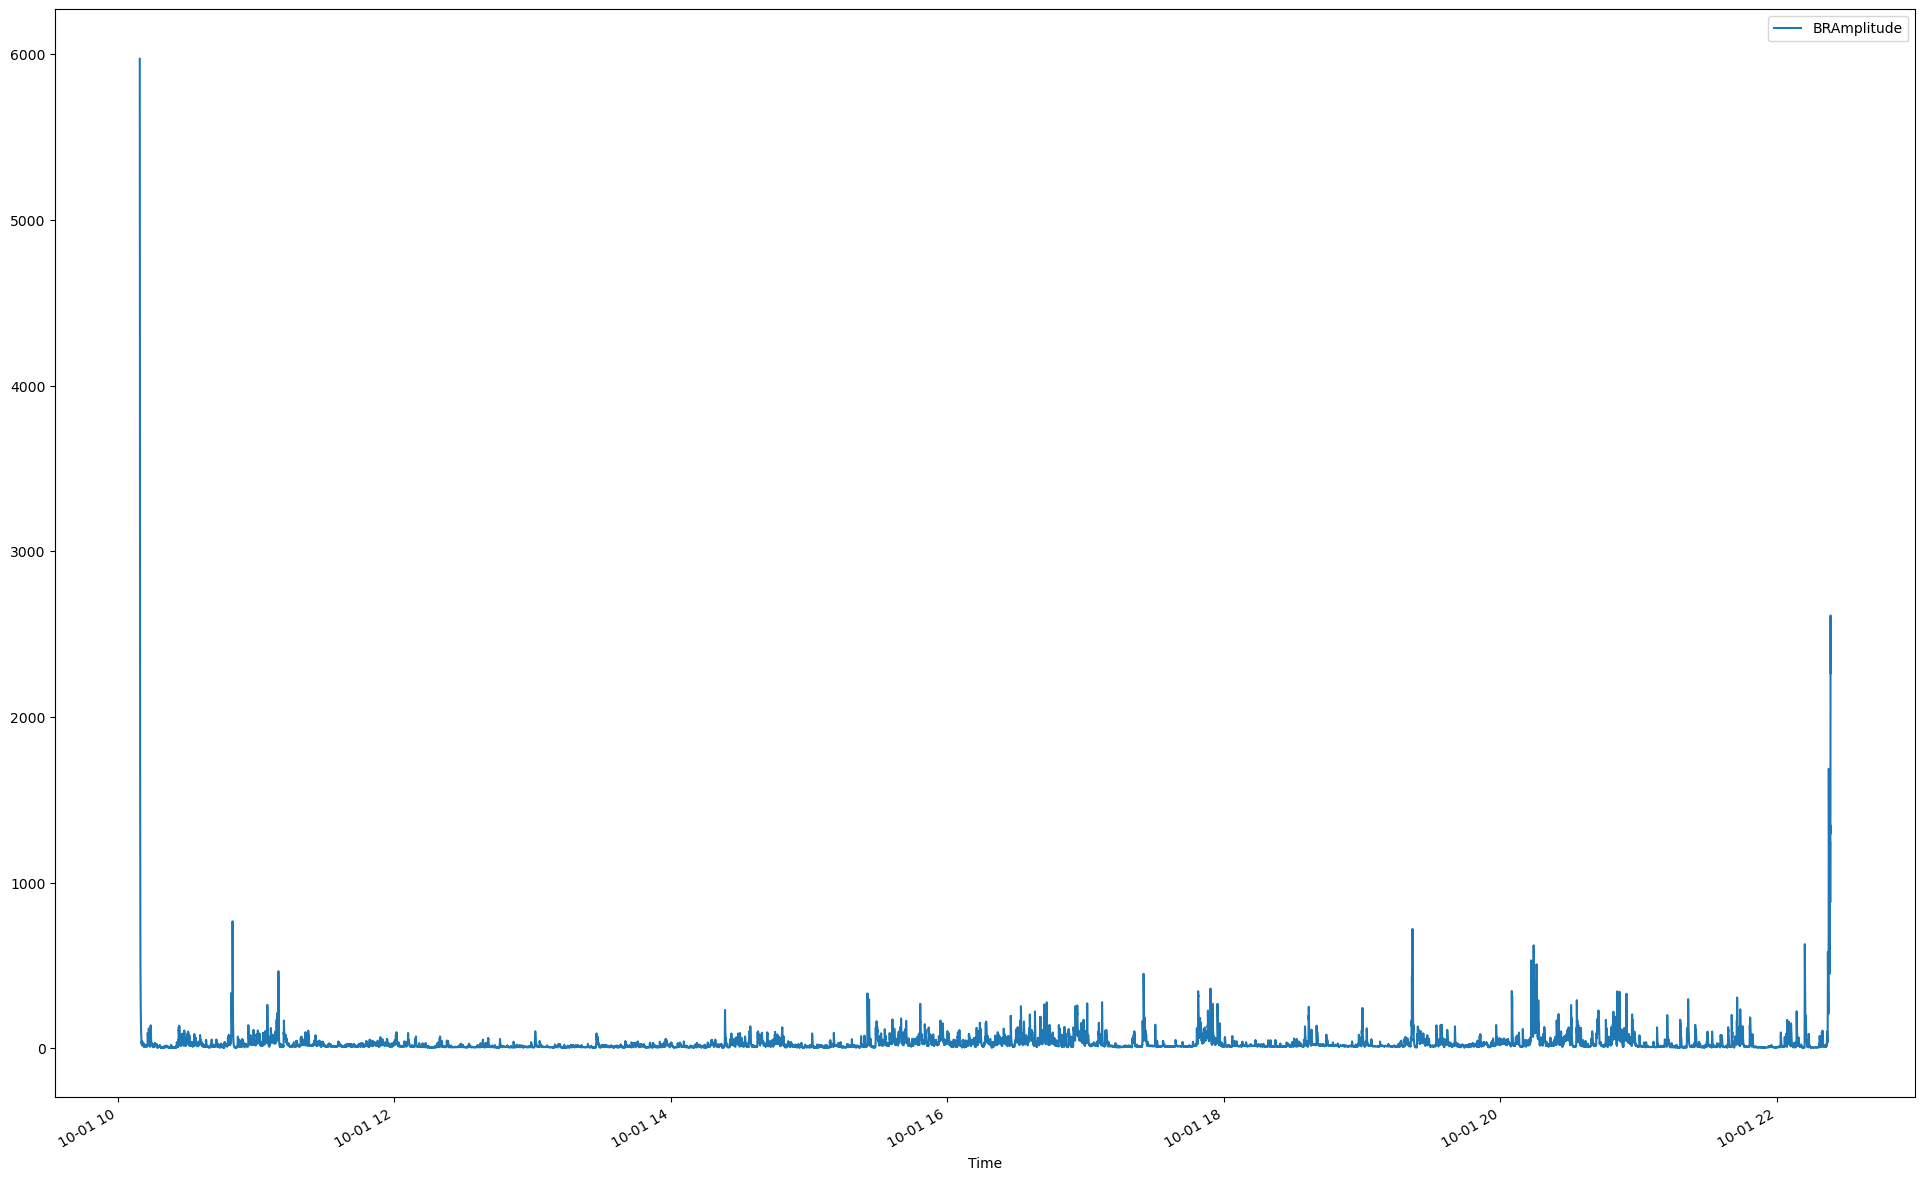

In [31]:
data[["BRAmplitude"]].plot()

In [32]:
data.drop(columns=["BRAmplitude"],inplace=True)

### ECG Amplitude


1. **Range**:0 – 0.05
2. **Units**: Volts

Extra notes

This value is filtered to attempt to remove noise related variation,  
however will increase during periods of high noise.

Spikes in ECG Amplitude could be useful to detect anomalies.

<AxesSubplot:xlabel='Time'>

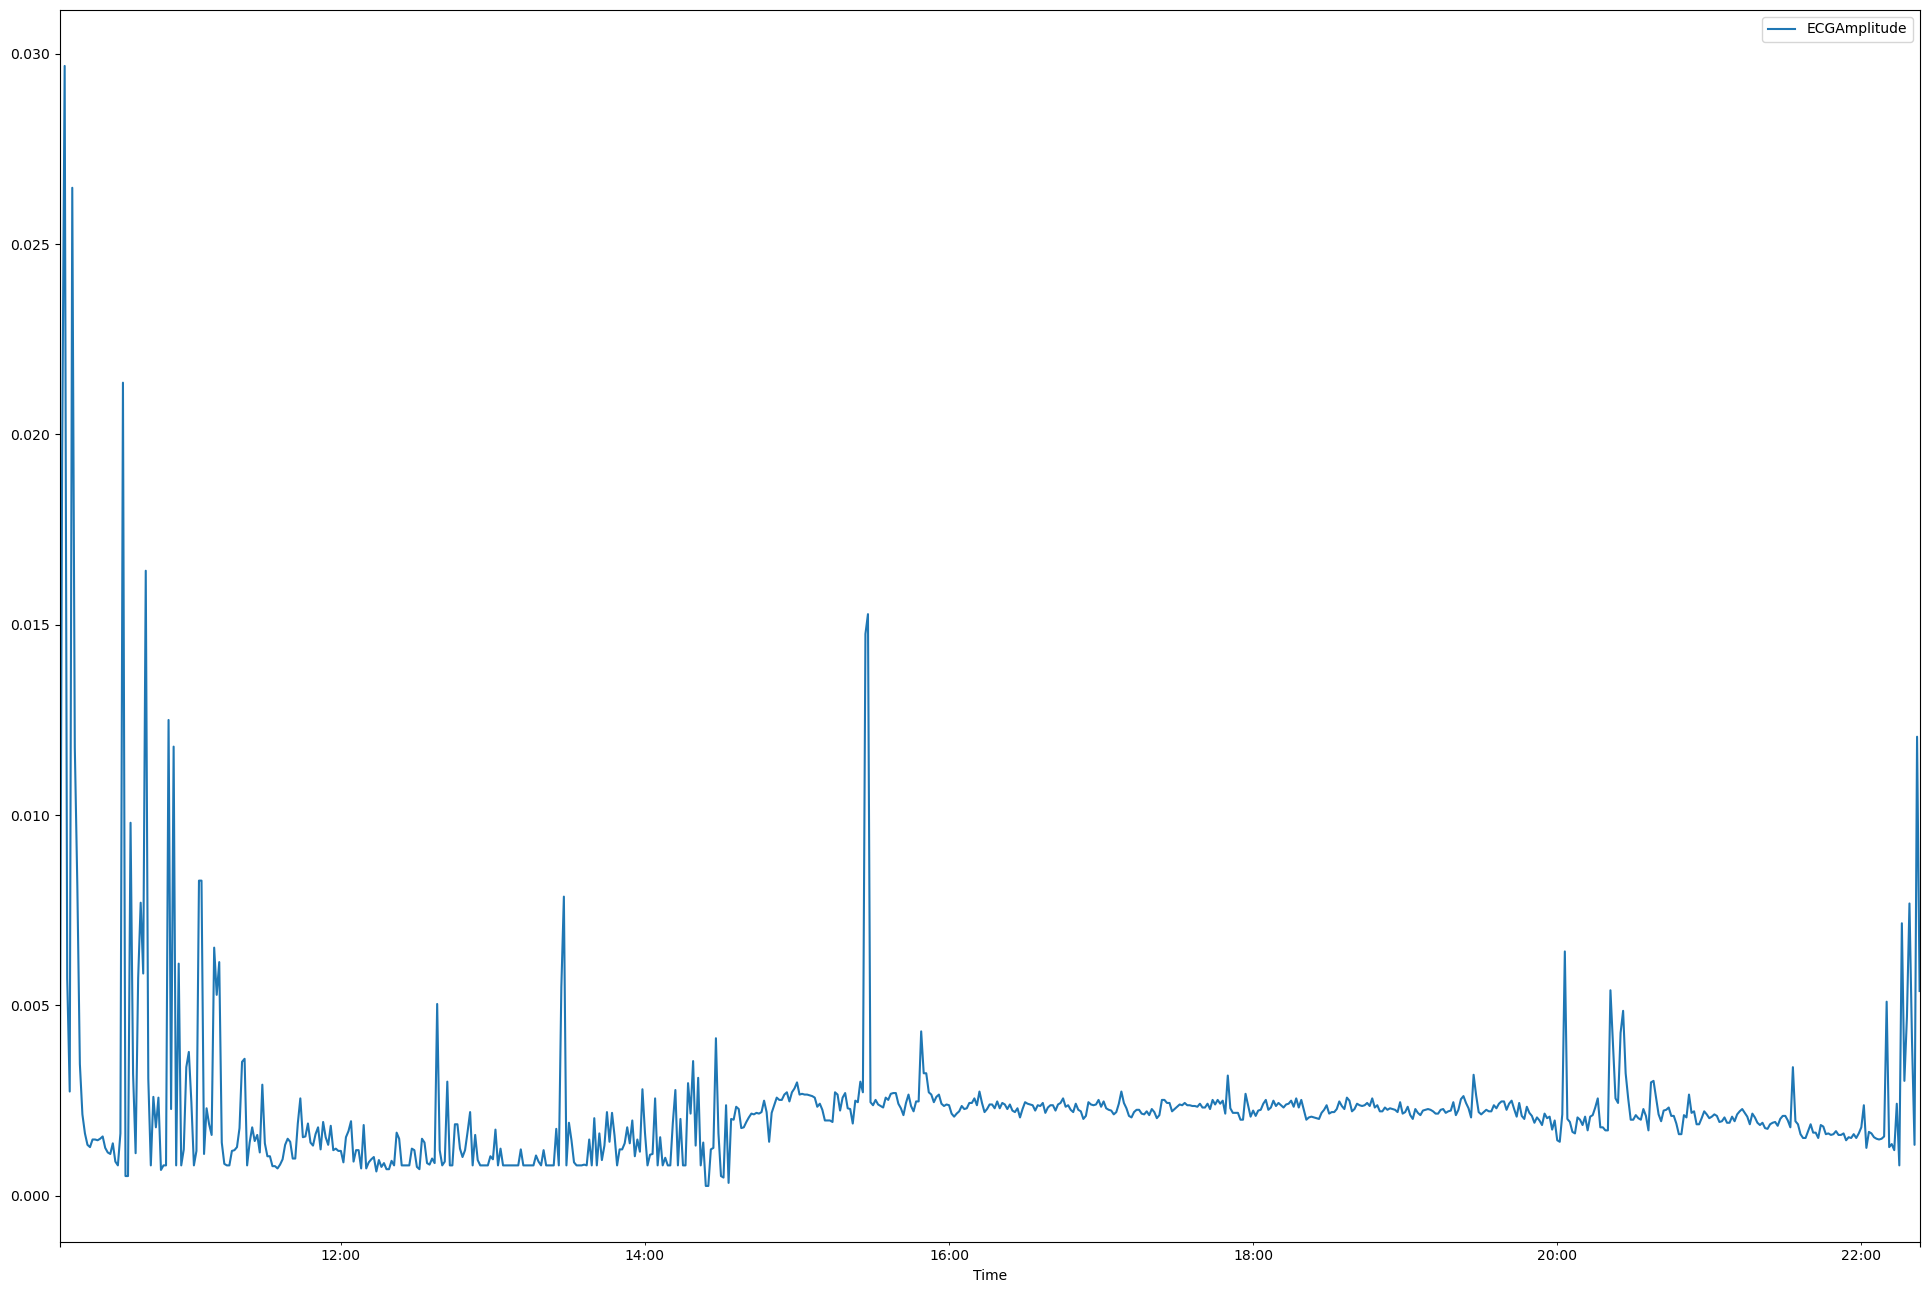

In [33]:
data[["ECGAmplitude"]].resample("t").max().plot()

### ECG Noise

1. **Range**:0 – 0.05
2. **Units**: Volts

Extra notes

This is directly comparable to the ECG Amplitude

Spikes in ECG Noise could be useful to detect anomalies.

<AxesSubplot:xlabel='Time'>

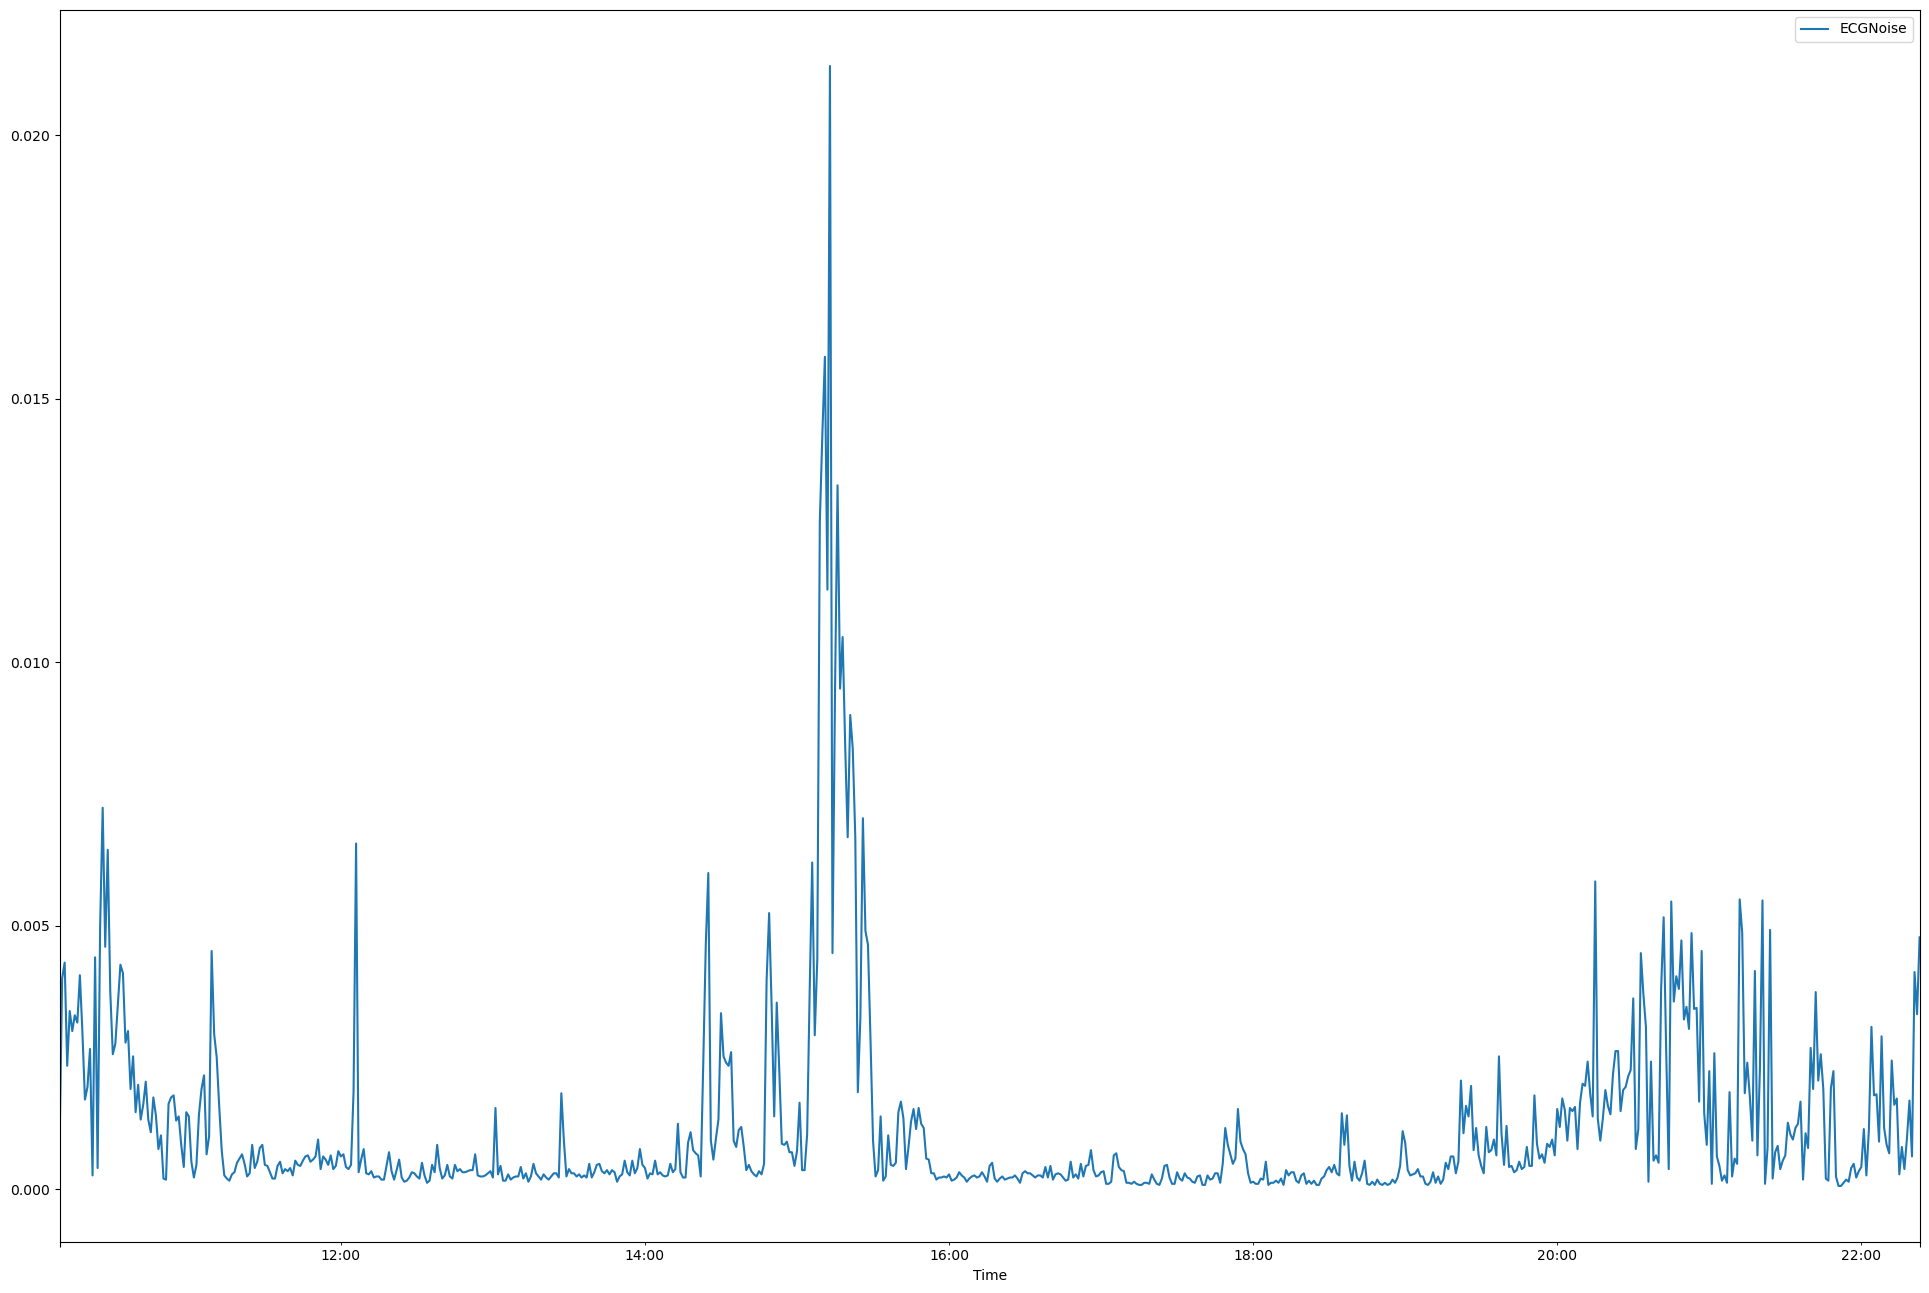

In [34]:
data[["ECGNoise"]].resample("t").max().plot()

In [35]:
data[["ECGAmplitude","ECGNoise"]].corr()

,ECGAmplitude,ECGNoise
ECGAmplitude,1.000000,0.154561
ECGNoise,0.154561,1.000000


Oddly enough there isn't much correlation between the features.

### HR Confidence


1. **Range**: 0 – 100
2. **Units**: %

Extra notes

An algorithm which takes into account a worn detection indication, and the signalto-noise ratio of the ECG signal is used to establish HR confidence.   
Above 20% indicates a reliable heart rate. 0% indicates not worn indication or an extremely noisy ECG signal


Low values could help indicate anomalies.

<AxesSubplot:ylabel='Count'>

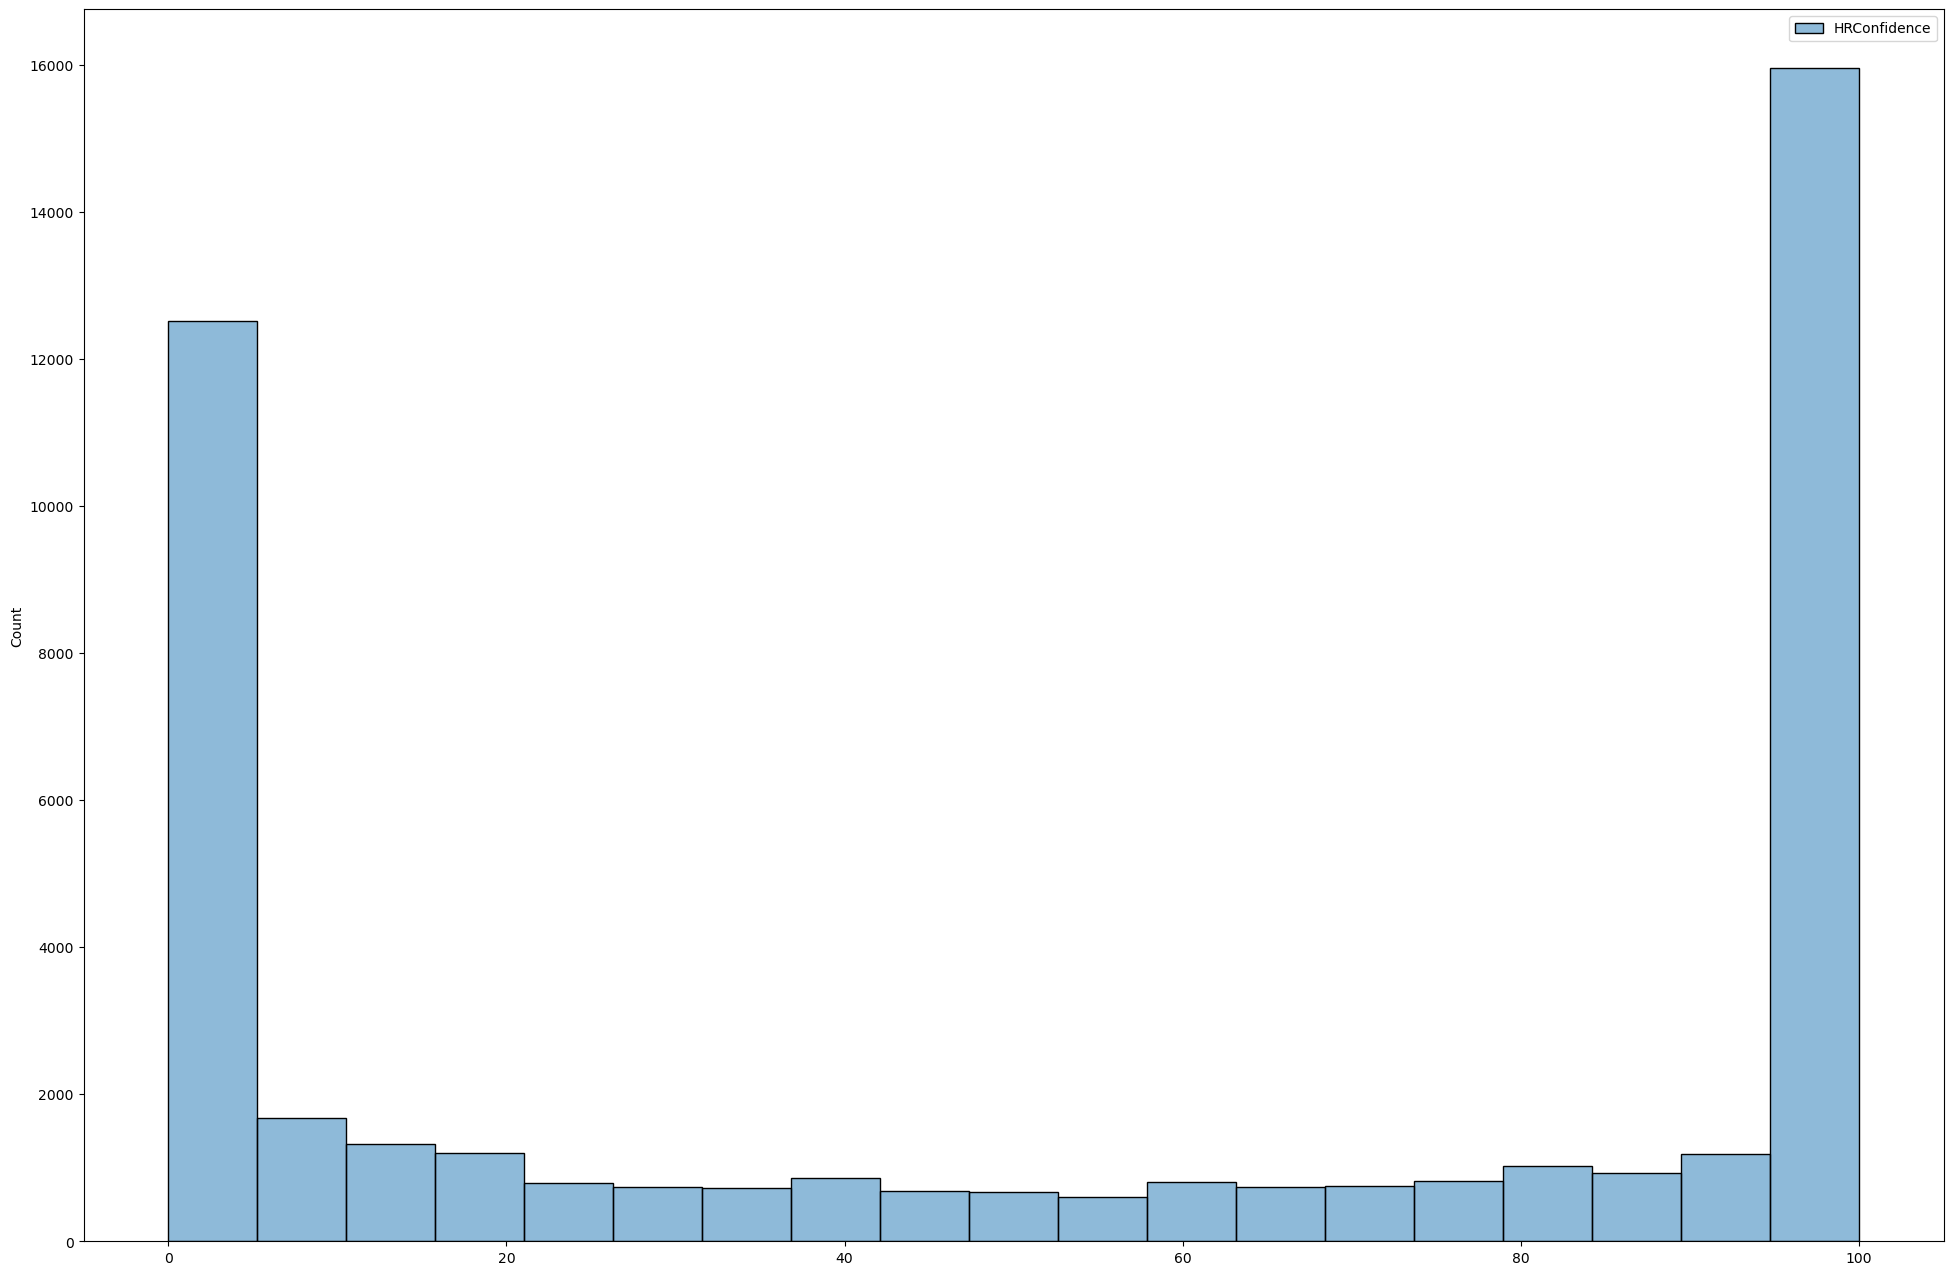

In [36]:
sns.histplot(data[["HRConfidence"]])

In [37]:
bad_readings = len(data[data["HRConfidence"] == 0]) / len(data)
reliable_readings = len(data[data["HRConfidence"] >= 20]) / len(data)

print(f"Approximately {(bad_readings*100):.2f}% of data is considered to have extremely noisy ECG signal")
print(f"Approximately {(reliable_readings*100):.2f}% of data is considered to have a reliable ECG signal")

Approximately 0.21% of data is considered to have extremely noisy ECG signal
Approximately 62.86% of data is considered to have a reliable ECG signal


### Heart Rate Variability


1. **Range**: 0 – 65534
2. **Units**: Standard deviation in milliseconds
3. **Invalid Value**: 65535

Extra notes

An algorithm calculates a rolling 300 heartbeat SDNN HRV value. This is updated
once per second. For the first 300 beats of log, an invalid value will be reported.

In [38]:
data["HRV"].describe()

count    44027.000000
mean     47951.306221
std      29018.905319
min         26.000000
25%         89.000000
50%      65535.000000
75%      65535.000000
max      65535.000000
Name: HRV, dtype: float64

<AxesSubplot:xlabel='HRV', ylabel='Count'>

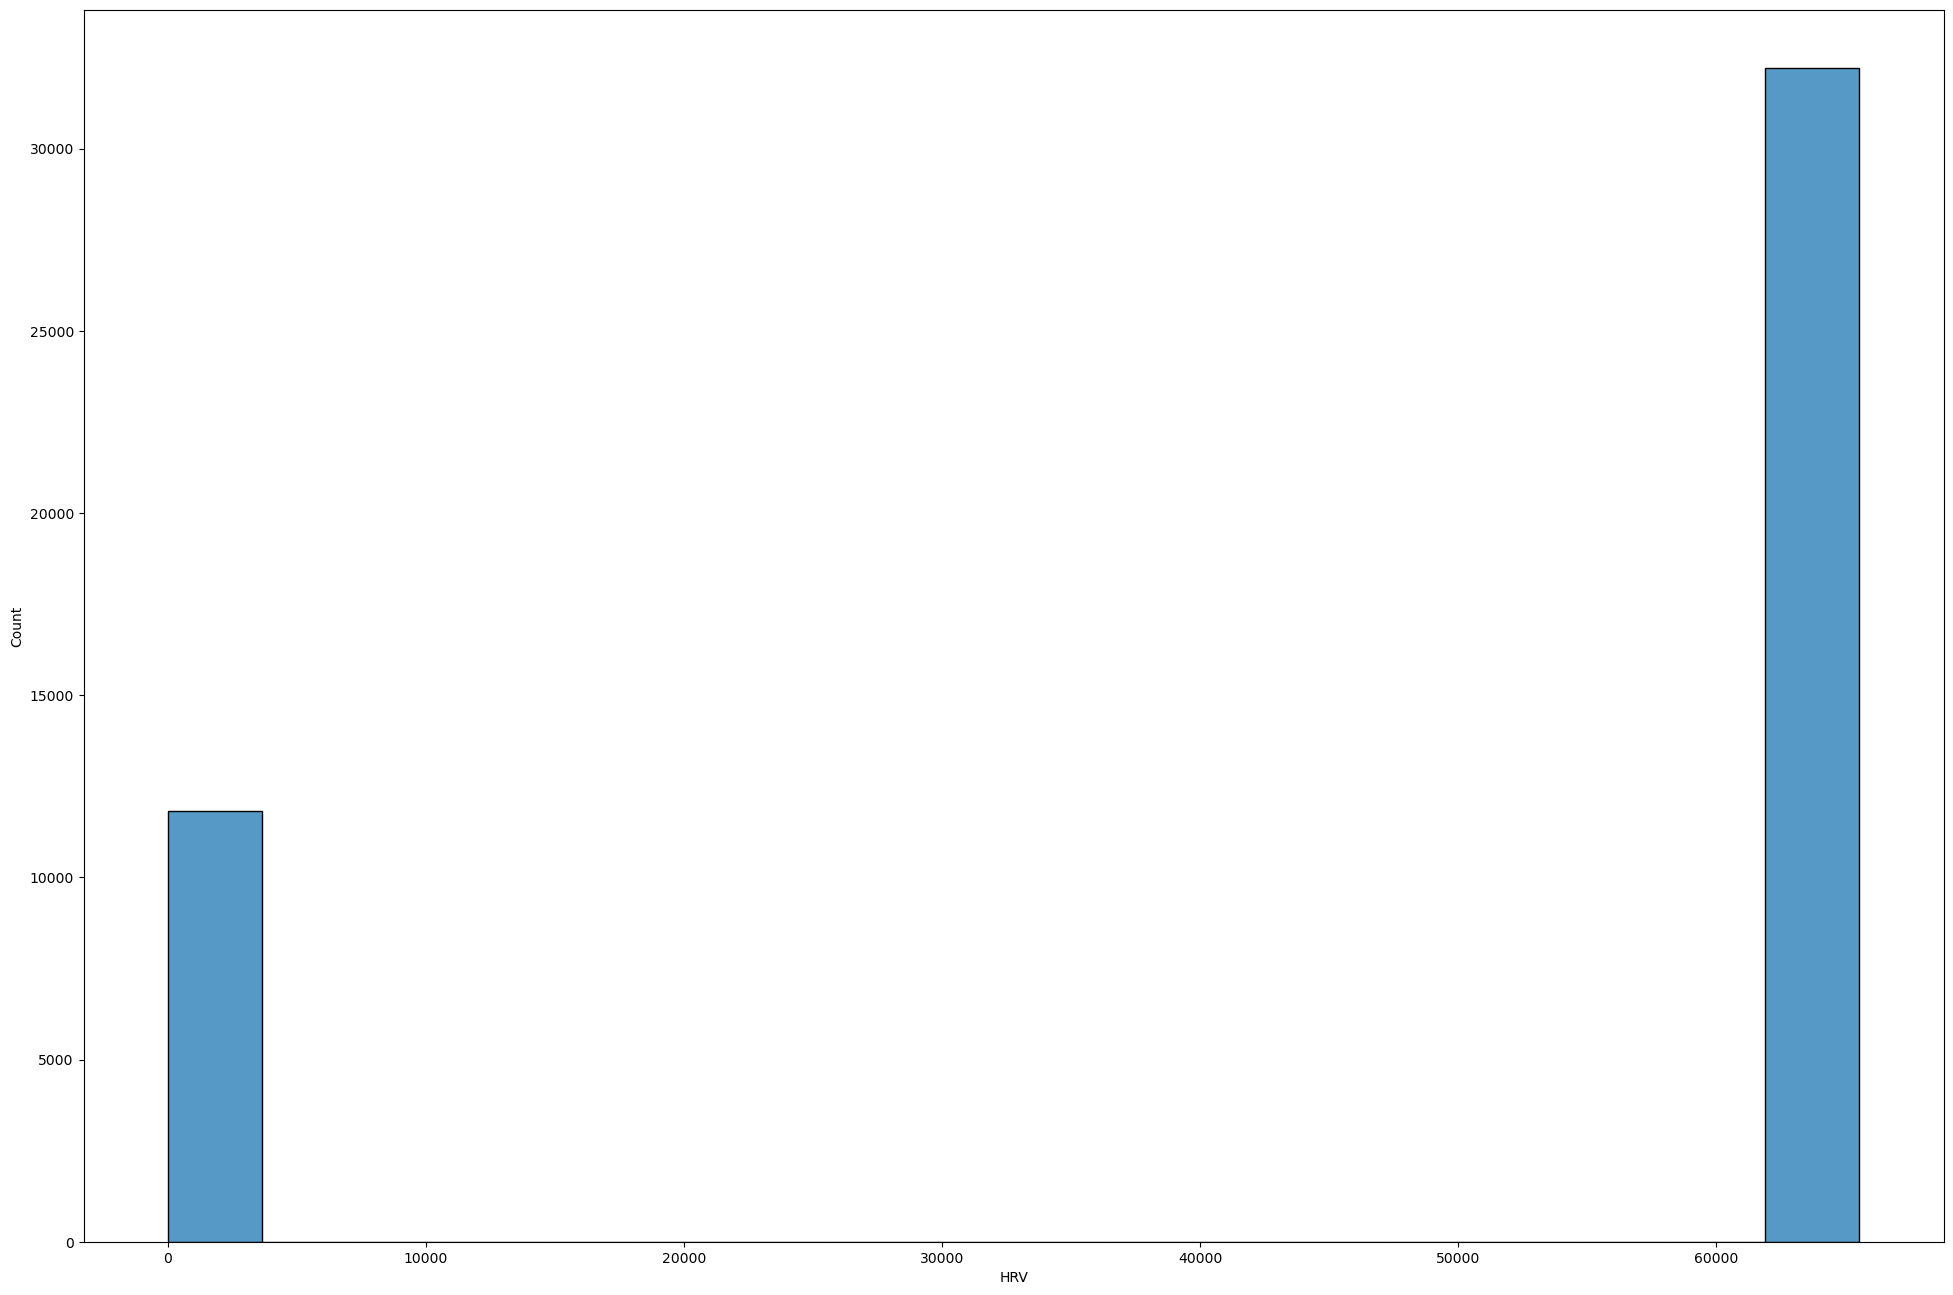

In [39]:
sns.histplot(data["HRV"])

As I mentioned in sensor_data notebook a majority of values for this feature throughout each subject and day are equal to 65535. Which is consider invalid, I will drop the column.

In [40]:
data.drop(columns=["HRV"],inplace=True)

### System Confidence


1. **Range**: 0 – 100
2. **Units**: %

Extra notes

System Confidence is a development parameter which will combine HR
confidence with other parameters as they become available. At present System
Confidence is identical to HR Confidence.

In [41]:
data[["SystemConfidence"]].describe()

,SystemConfidence
count,44027.000000
mean,61.648534
std,48.624740
min,0.000000
25%,0.000000
50%,100.000000
75%,100.000000
max,100.000000


In [42]:
data[["HRConfidence","SystemConfidence"]].corr()

,HRConfidence,SystemConfidence
HRConfidence,1.000000,0.888702
SystemConfidence,0.888702,1.000000


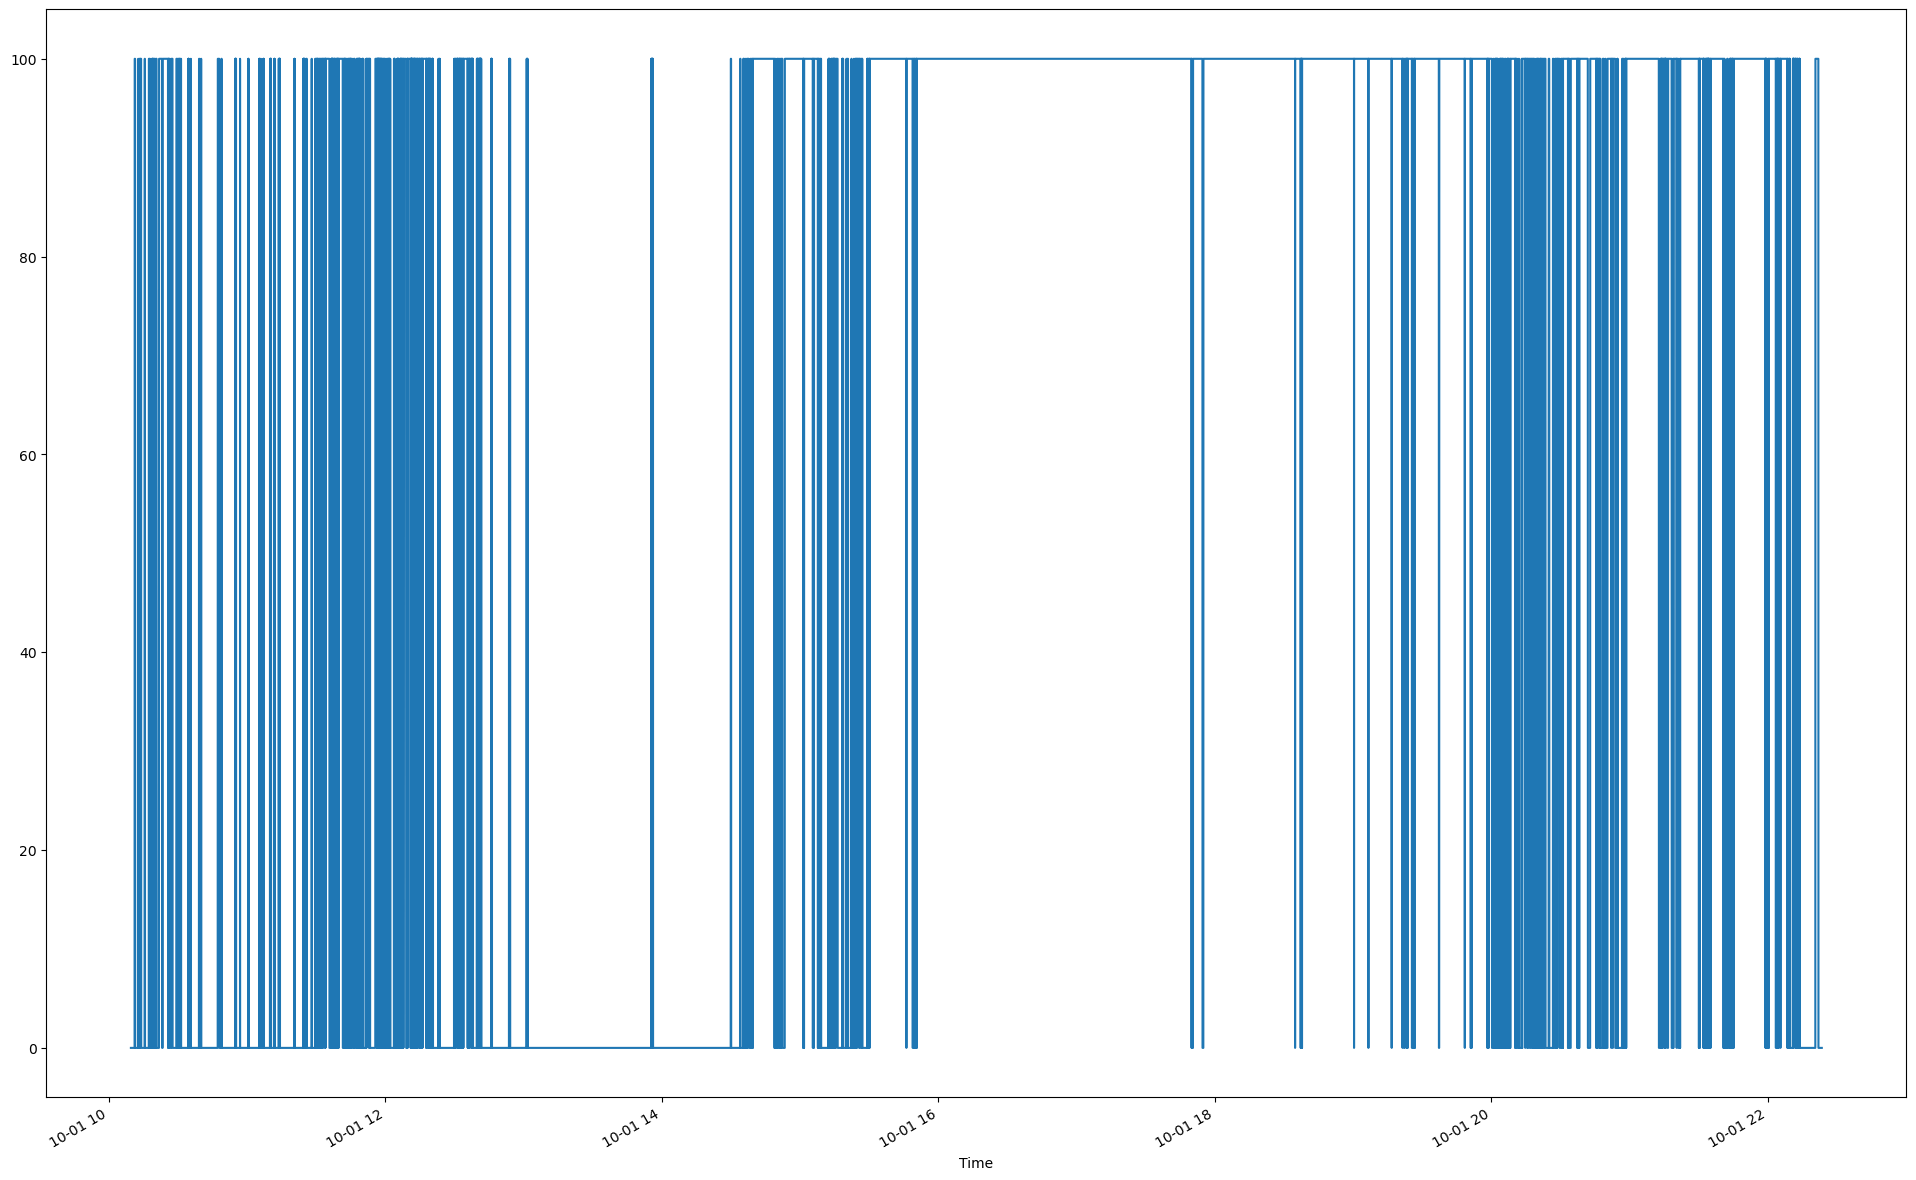

In [43]:
data["SystemConfidence"].plot();

In [44]:
data["SystemConfidence"].value_counts()

100    27142
0      16885
Name: SystemConfidence, dtype: int64

Since this is closely related and correlated with HRConfidence.  
I most likely wont need both features and since this feature is binary  
HRConfidence may contain more information. So I will drop SystemConfidence.

In [45]:
data.drop(columns=["SystemConfidence"], inplace=True)

### System Variables

1. Temperature:
    1. 'DeviceTemp'
    2. 'CoreTemp'
2. Hardware circuit noise:
    1. 'AuxADC1'
    2. 'AuxADC2'
    3. 'AuxADC3'
3. StatusInfo: "Status codes must be broken down to a binary representation"

The temperature of the device could be usefully to help detect anomalies in the data e.g. if the device is overheating other values may produce anomalies. But since I already have a number of features for this reason I may drop in the hopes in makeing the dataset a more manageable size.

The hardware circuit noise from my understanding this is intended to be used for additionaly functionality but it is unclear what this is, for this reason I will also drop these columns.

As seen below the StatusInfo can be one of the outputs below but there is no indication on what each code means in the documentation. 

So I will drop all 6 columns.

In [46]:
data[["StatusInfo"]].value_counts()

StatusInfo
512           16982
0             10160
528            9179
531            7698
532               6
535               2
dtype: int64

In [47]:
data.drop(columns=["DeviceTemp","CoreTemp","AuxADC1","AuxADC2","AuxADC3","StatusInfo","ROGTime"],inplace=True)

In [48]:
data[["VerticalMin","VerticalPeak","LateralMin","LateralPeak","SagittalMin","SagittalPeak"]].describe()

,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak
count,44027.000000,44027.000000,44027.000000,44027.000000,44027.000000,44027.000000
mean,-0.975392,-0.825796,-0.129269,0.001065,0.216655,0.367189
std,0.205514,0.152348,0.245906,0.203660,0.325826,0.262996
min,-7.570000,-0.980000,-6.150000,-0.810000,-7.810000,-0.910000
25%,-1.030000,-0.930000,-0.320000,-0.100000,0.020000,0.220000
50%,-0.970000,-0.890000,-0.080000,0.030000,0.270000,0.420000
75%,-0.920000,-0.770000,0.060000,0.130000,0.430000,0.550000
max,0.500000,1.100000,0.830000,2.090000,0.750000,1.970000


In [49]:
data[["VerticalMin","VerticalPeak","LateralMin","LateralPeak","SagittalMin","SagittalPeak"]].corr()

,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak
VerticalMin,1.000000,0.239371,0.529545,0.176905,0.531288,0.121485
VerticalPeak,0.239371,1.000000,0.004623,0.258936,-0.039342,0.256216
LateralMin,0.529545,0.004623,1.000000,0.814990,0.843969,0.635970
LateralPeak,0.176905,0.258936,0.814990,1.000000,0.645702,0.777558
SagittalMin,0.531288,-0.039342,0.843969,0.645702,1.000000,0.773392
SagittalPeak,0.121485,0.256216,0.635970,0.777558,0.773392,1.000000


<AxesSubplot:xlabel='Time'>

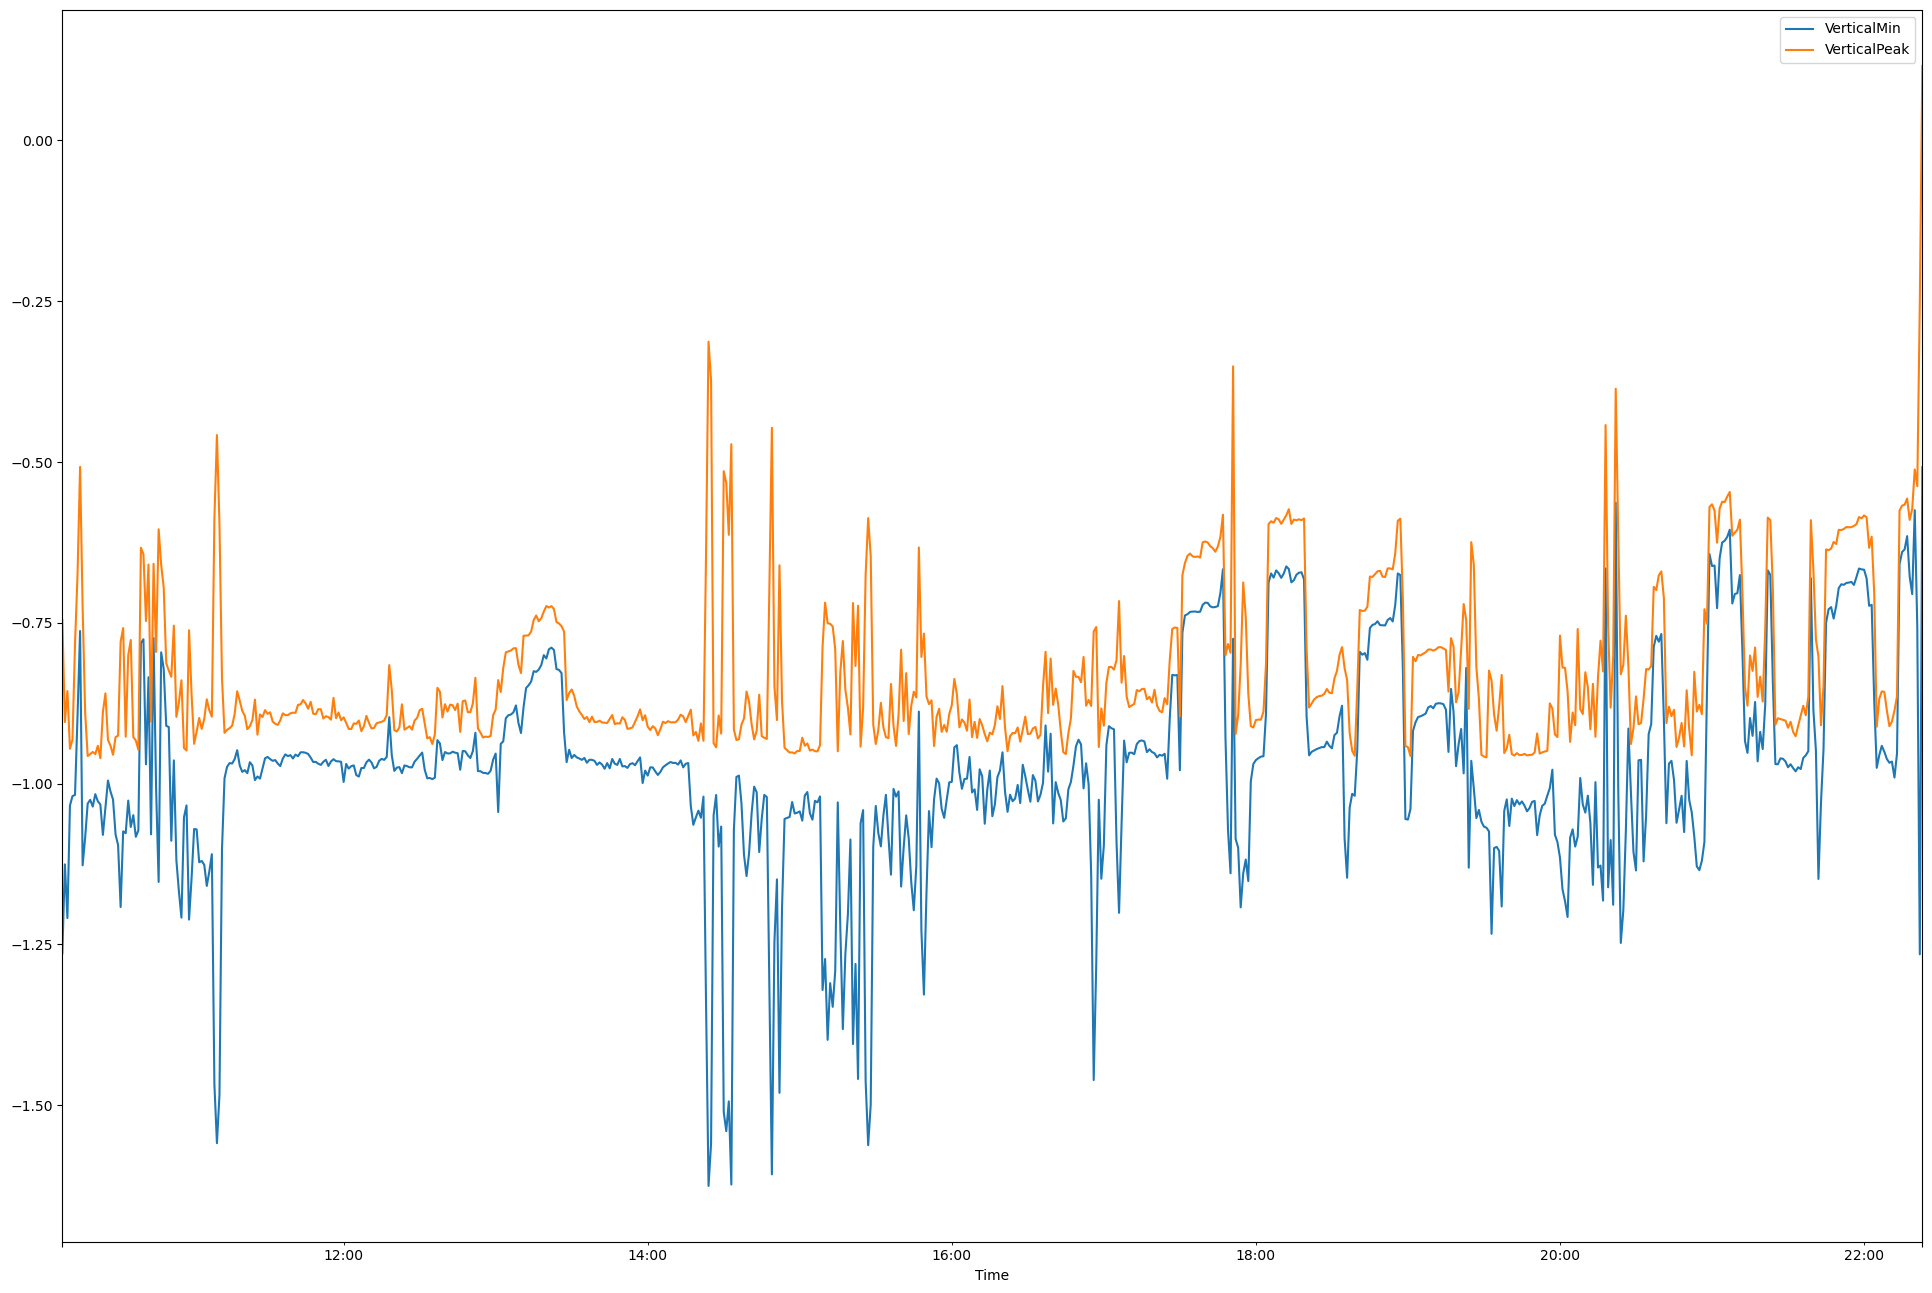

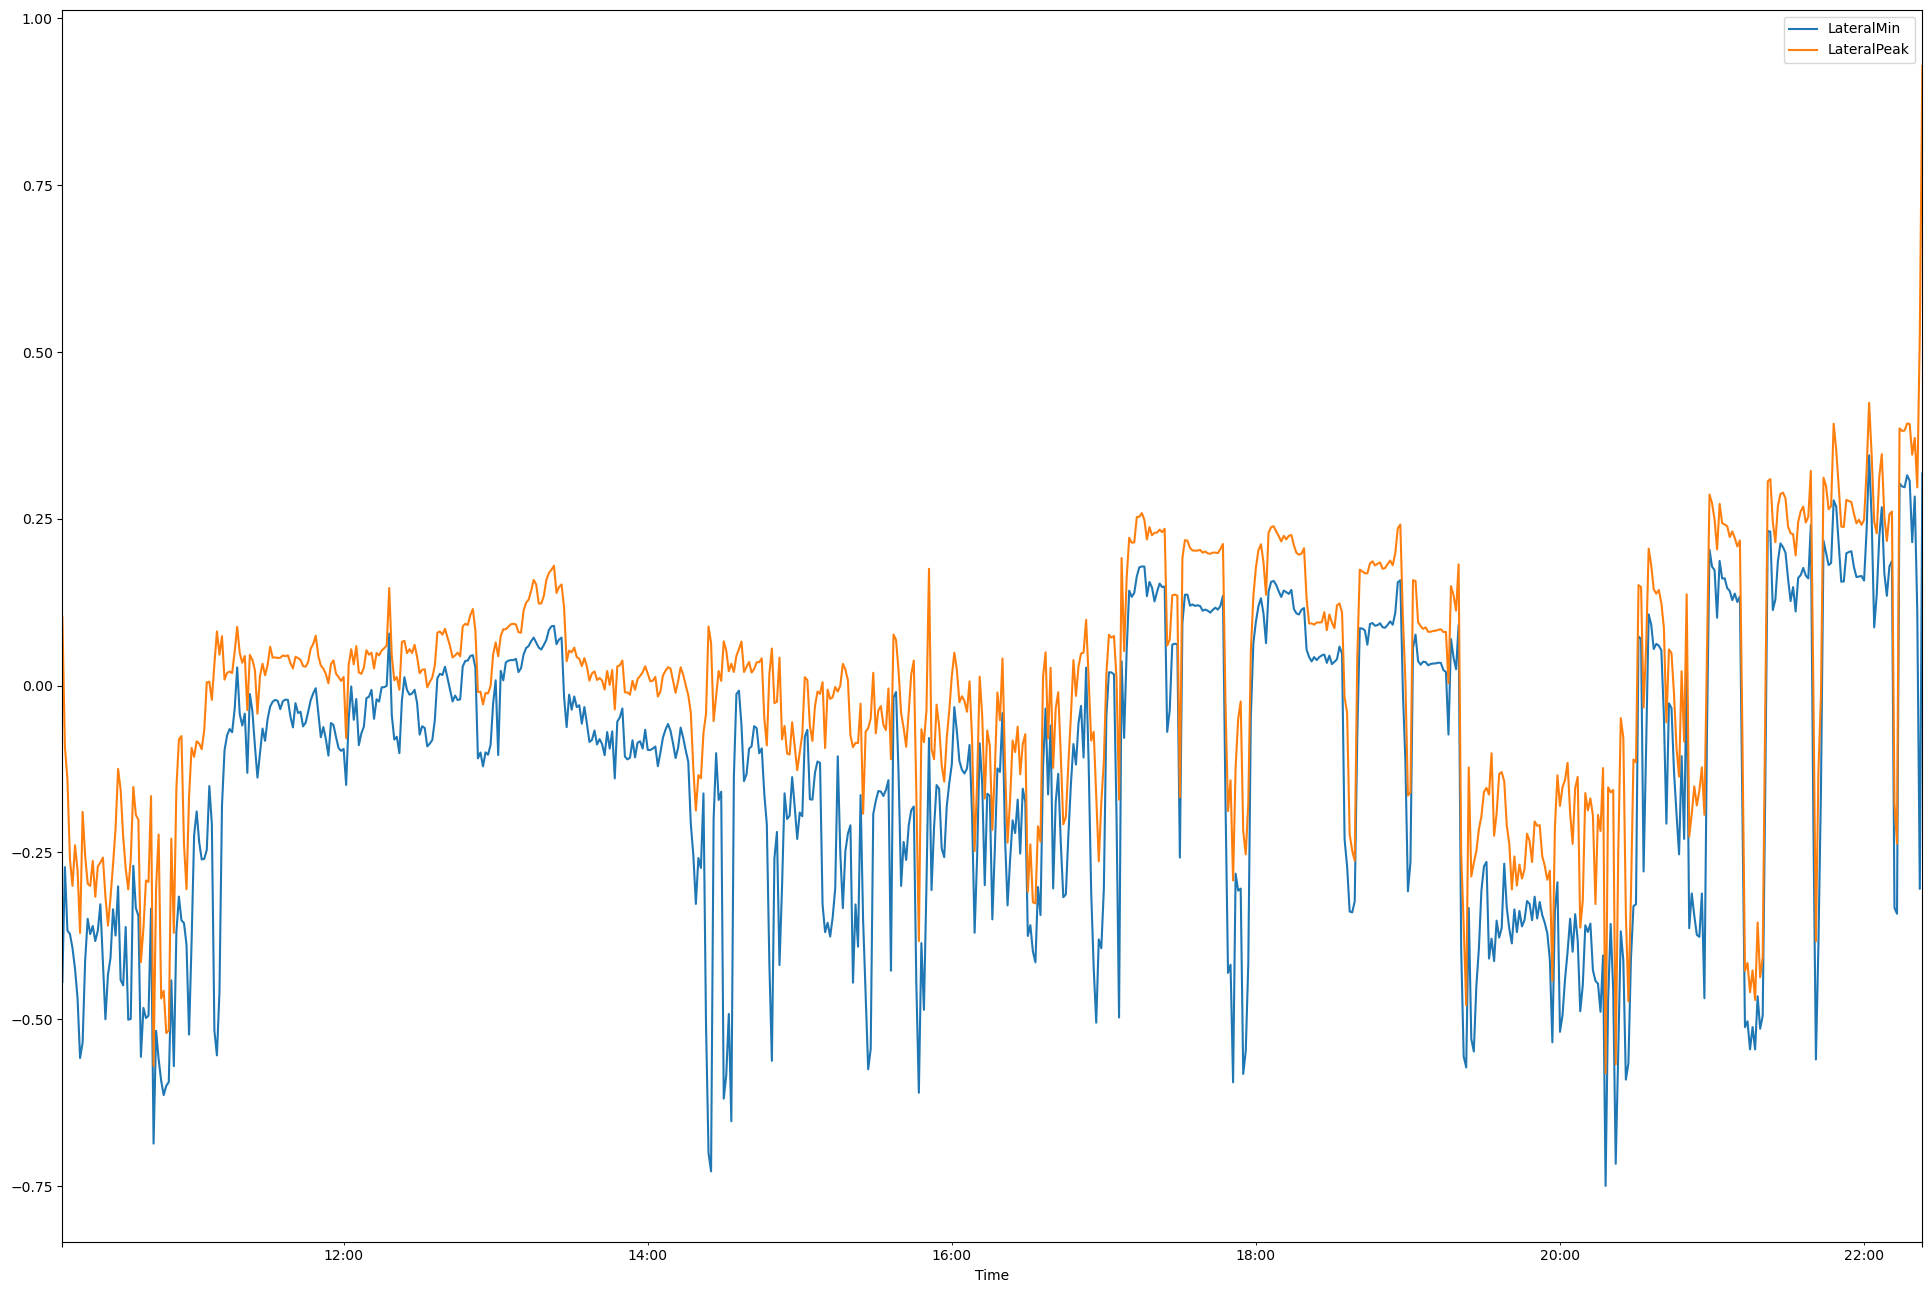

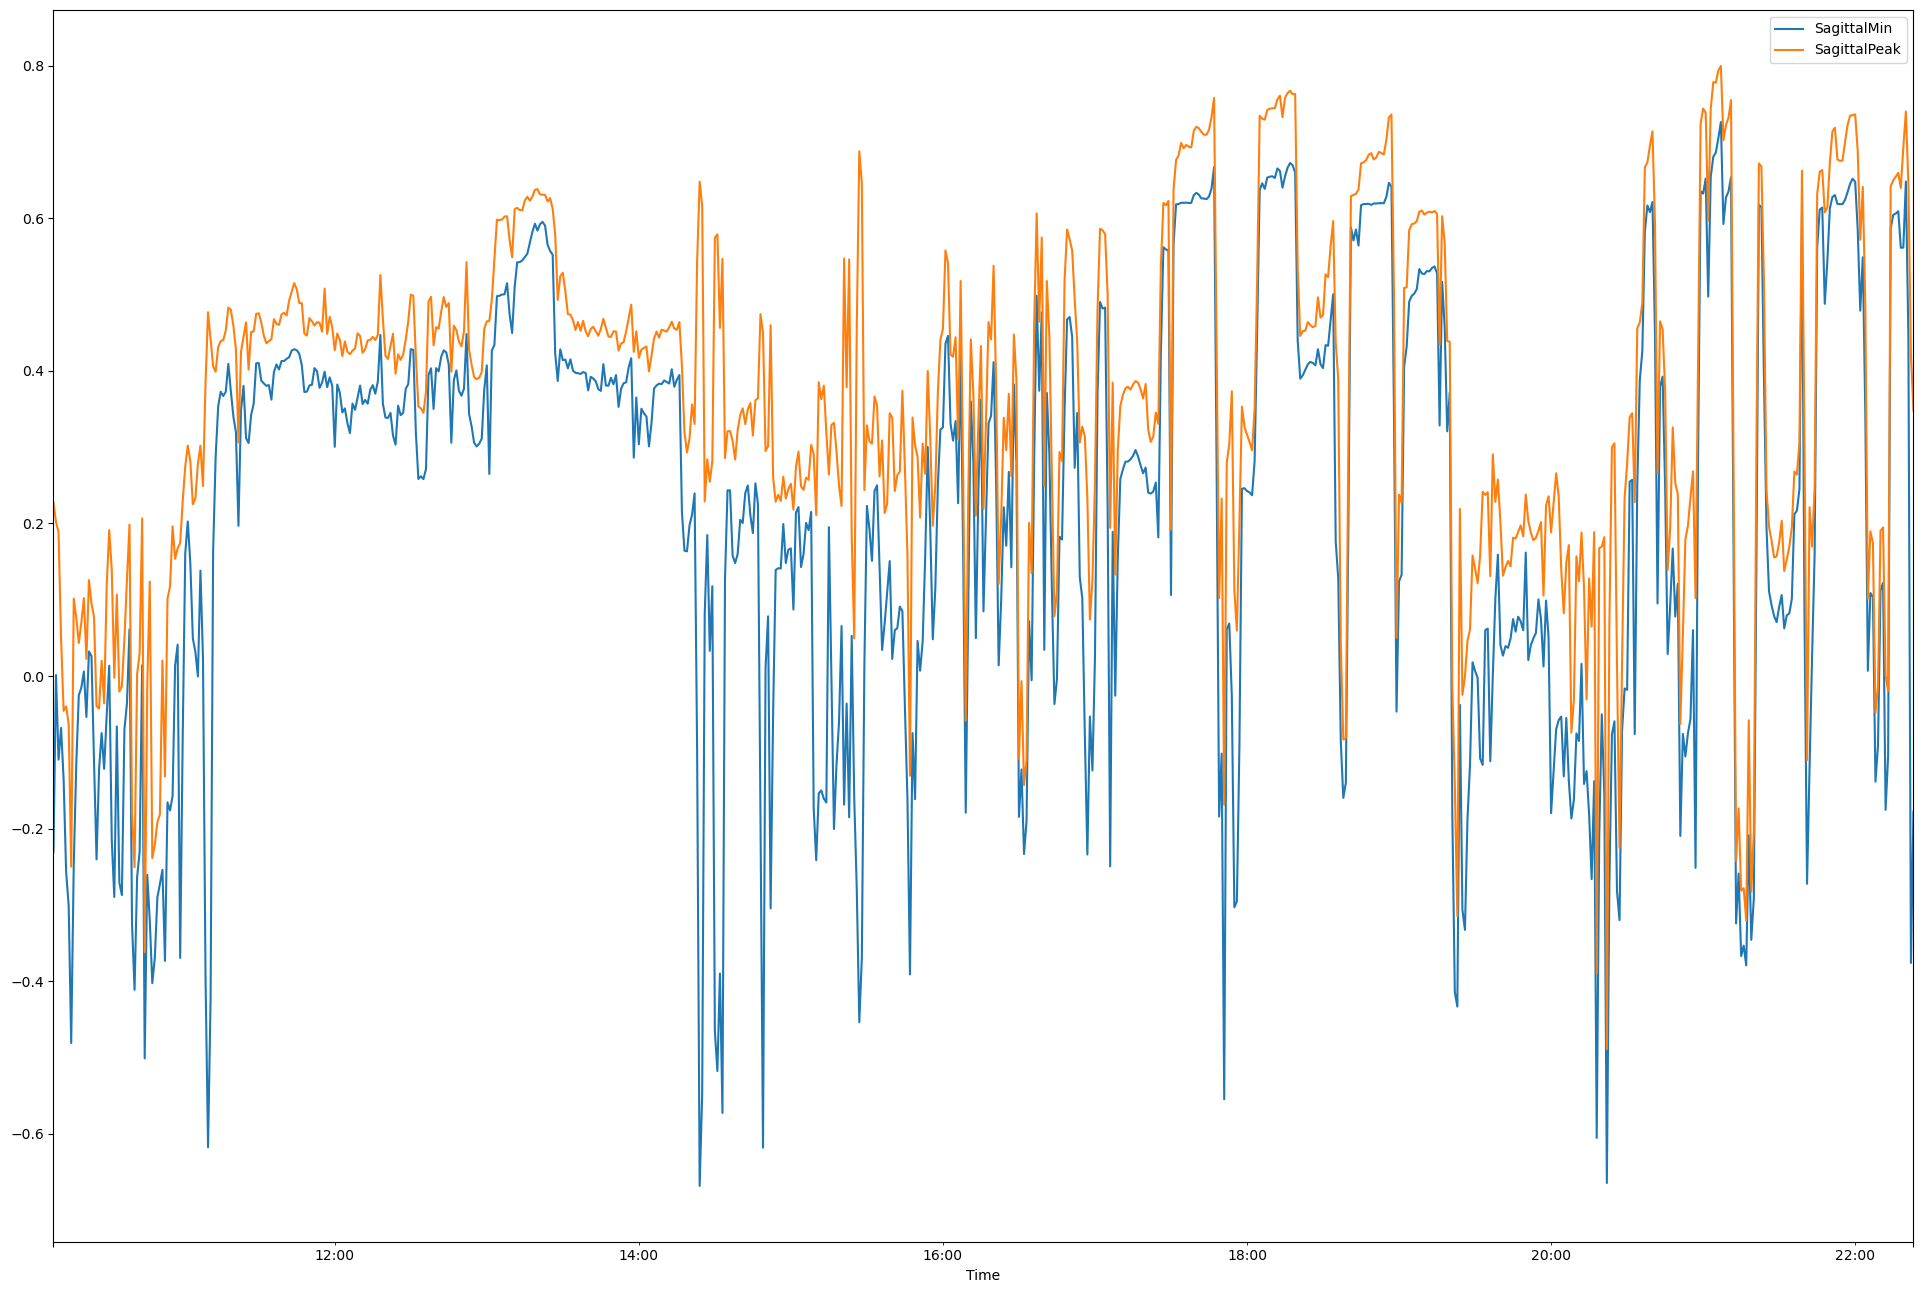

In [50]:
data[["VerticalMin","VerticalPeak"]].resample("t").mean().plot()
data[["LateralMin","LateralPeak"]].resample("t").mean().plot()
data[["SagittalMin","SagittalPeak"]].resample("t").mean().plot()

In [51]:
drop_columns = list(orginal_columns.difference(set(data.columns)))

In [55]:
def import_files(path, drop_columns):
    for subject_type in os.listdir(path):
        for subject_ID in os.listdir(f"{path}/{subject_type}"):
            for day in os.listdir(f"{path}/{subject_type}/{subject_ID}/sensor_data"):
                try:
                    df = pd.read_csv(f"{path}/{subject_type}/{subject_ID}/sensor_data/{day}/{day}_Summary.csv")
                    df["Time"] = pd.to_datetime(df["Time"], format="%d/%m/%Y %H:%M:%S.%f")
                    try:
                        df.drop(columns=drop_columns, inplace=True)
                    except KeyError:
                        for colName in drop_columns:
                            if colName in df.columns:
                                df.drop(columns=[colName], inplace=True)
                    df.to_csv(f"{path}/{subject_type}/{subject_ID}/sensor_data/{day}/{day}_Summary.csv",index=False)
                except FileNotFoundError:
                    pass
            print(f"{subject_type}_{subject_ID}: Done")

In [56]:
import_files("data/processed_data", drop_columns)

diabetes_subset_001: Done
diabetes_subset_004: Done
diabetes_subset_005: Done
diabetes_subset_007: Done
diabetes_subset_008: Done
healthy_subset_002: Done
healthy_subset_004: Done
healthy_subset_007: Done
healthy_subset_012_diabetes: Done
healthy_subset_016: Done
healthy_subset_017: Done
